## Lead Scoring Case Study

<div style="text-align: right"> <font color = Indigo >-- By Maniswaroop Meduri </div>

**Problem Statement**<br>

An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

**Goals and Objectives**<br>
There are quite a few goals for this case study.
<ul>
    
<li>Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
<li>There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

The steps are broadly:
<ol>
<li> Read the data
<li>Fix Data Quality Issues
<li>Check for missing values in the data
<li>Visualize the data - Univariate, Bi-Variate (Cat-Num, Cat-Cat, Num-Num) & Multivariate
<li>Outlier detection and treatment
<li>Prepare the data for modelling
    <ul>
    <li> Dummy Variables
    <li> Test Train Split    
    <li> Scaling
    </ul>        
<li>Modelling
    <ul>     
        <li> Train Data Analysis
        <li> RFE 
        <li> Manual Selection using P-Values & VIF
        <li> ROC Curve and Check the optimal cut-off for Accuracy, Sensitivity and Specificity
        <li> Check the Metrics
        <li> Predict the Test Lead Scores and check sensitivity of the model    
    </ul>
</ol>

# 1. Read and Inspect the data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
from math import isnan

import sklearn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_recall_curve

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns',50)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [5]:
# read the dataset
leads_df = pd.read_csv("Leads.csv", sep=",")
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
leads_df.shape

(9240, 37)

In [7]:
# basics of the df
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# 2. Fix Data Quality Issues

In [9]:
### Reusable function to find the total missing values,percentage,datatype and unique values
def meta_data(data):
    total = data.isnull().sum()
    percent = (total/len(data))*100
    datatype = data.dtypes
    unique = data.nunique()
    
    return pd.concat([total,percent,datatype,unique],axis=1,keys=['Total_missing_Values','percent','datatypes','unique'])
meta_data(leads_df).sort_values('percent', ascending=False)

,Total_missing_Values,percent,datatypes,unique
Lead Quality,4767,51.590909,object,5
Asymmetrique Activity Index,4218,45.649351,object,3
Asymmetrique Profile Score,4218,45.649351,float64,10
Asymmetrique Activity Score,4218,45.649351,float64,12
Asymmetrique Profile Index,4218,45.649351,object,3
Tags,3353,36.287879,object,26
Lead Profile,2709,29.318182,object,6
What matters most to you in choosing a course,2709,29.318182,object,3
What is your current occupation,2690,29.112554,object,6
Country,2461,26.634199,object,38


<div class="alert alert-block alert-success">
Columns with just 1 value will not impact the analysis or the model, so removing the below columns:
        <ul>
            <li>Magazine                                            1
            <li>Update me on Supply Chain Content                   1
            <li>Receive More Updates About Our Courses              1
            <li>Get updates on DM Content                           1
            <li>I agree to pay the amount through cheque            1
        </ul>
</div>

In [10]:
leads_df.drop(['Magazine',
               'Update me on Supply Chain Content',
               'Receive More Updates About Our Courses',
               'Get updates on DM Content',
               'I agree to pay the amount through cheque'],axis=1, inplace=True)
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [11]:
leads_df.shape

(9240, 32)

In [12]:
# Check values of categorical columns
for i in leads_df.columns:
        if leads_df[i].dtypes =='O':
            print(i)
            print(leads_df[i].value_counts())
            print("\n")


Prospect ID
32151ee1-2f55-4224-83ef-91f927c75d6e    1
e4c7bb51-b93d-46d3-8eec-d2c4fa954a5c    1
a112c57b-d54b-44ec-9287-d10217bc9cda    1
ae9066aa-f85e-46ed-a5f0-34bf560c27b3    1
cc694166-cdae-4b68-8cac-784297d15c1b    1
                                       ..
c9646d6c-daf5-4e1b-b099-5eb2bfd4faaa    1
1eaf1386-6400-497d-ad67-48062296a5b8    1
b9eeb60b-be15-42f4-8fea-ac967f1685c0    1
7d3d316d-20ef-4fb9-a779-6808400a4204    1
57dc2c71-89db-4541-8890-d227dc717745    1
Name: Prospect ID, Length: 9240, dtype: int64


Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5


<div class="alert alert-block alert-success">
            Removing the below column as it is ID column and has unique values
            <ul>
                <li>Prospect ID
            </ul>
</div>

In [13]:
# Dropping Prospect ID column as it has unique values for all records

leads_df.drop(['Prospect ID'], inplace=True, axis=1)

<div class="alert alert-block alert-success">
            Below columns have something like 'Select' as a value for the column which means the data is not available. <br>Replacing with NaN for now and will handle in next segment
            <ul>
                <li>Specialization
                <li>How did you hear about X Education
                <li>City
                <li>Lead Profile
            </ul>
</div>

In [14]:
leads_df.isin(['select','Select']).any()

Lead Number                                      False
Lead Origin                                      False
Lead Source                                      False
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                      False
Total Time Spent on Website                      False
Page Views Per Visit                             False
Last Activity                                    False
Country                                          False
Specialization                                    True
How did you hear about X Education                True
What is your current occupation                  False
What matters most to you in choosing a course    False
Search                                           False
Newspaper Article                                False
X Education Forums                               False
Newspaper 

<div class="alert alert-block alert-success">
            Replacing wherever 'select' values in the dataframe with NaN.
            After againg checking for is there 'select' values remain still in the dataframe
</div>

In [15]:
leads_df.replace(['select','Select'],np.nan,inplace=True)
# leads_df[leads_df]

In [16]:
leads_df.isin(['select','Select']).any()

Lead Number                                      False
Lead Origin                                      False
Lead Source                                      False
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                      False
Total Time Spent on Website                      False
Page Views Per Visit                             False
Last Activity                                    False
Country                                          False
Specialization                                   False
How did you hear about X Education               False
What is your current occupation                  False
What matters most to you in choosing a course    False
Search                                           False
Newspaper Article                                False
X Education Forums                               False
Newspaper 

# 3. Checking & Handling for Missing Values

In [17]:
# missing values
meta_data(leads_df).sort_values('percent', ascending=False)

,Total_missing_Values,percent,datatypes,unique
How did you hear about X Education,7250,78.463203,object,9
Lead Profile,6855,74.188312,object,5
Lead Quality,4767,51.590909,object,5
Asymmetrique Profile Score,4218,45.649351,float64,10
Asymmetrique Activity Score,4218,45.649351,float64,12
Asymmetrique Profile Index,4218,45.649351,object,3
Asymmetrique Activity Index,4218,45.649351,object,3
City,3669,39.707792,object,6
Specialization,3380,36.580087,object,18
Tags,3353,36.287879,object,26


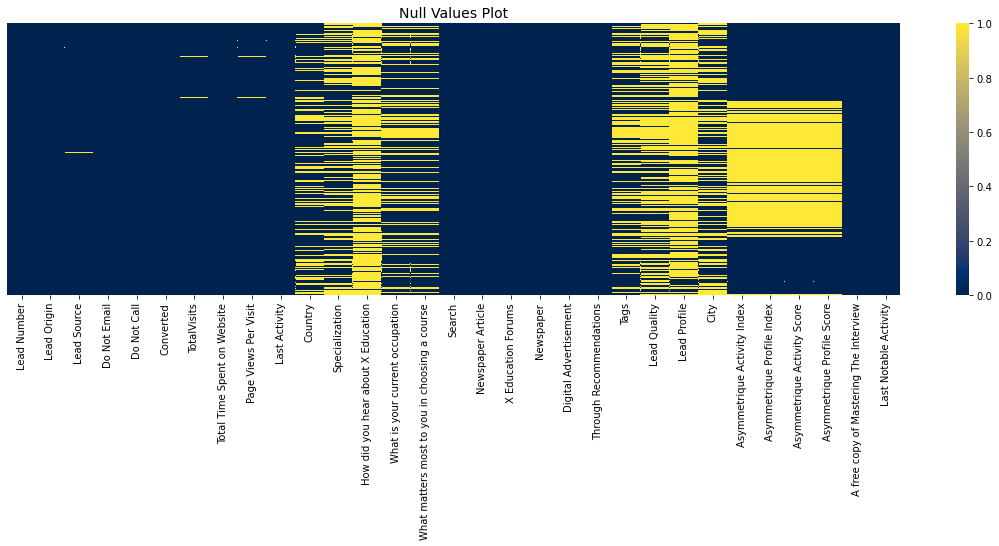

In [18]:
plt.figure(figsize=[20,5])
a=sns.heatmap(leads_df.isnull(),yticklabels=False,cmap='cividis')
plt.title("Null Values Plot", fontdict={'fontsize':14})
plt.show()

<div class="alert alert-block alert-success">
            Removing columns that have more than 40% missing values and also these columns are generated by Sales Team & do not come from Source system so we need not have them in the model.
            <ul>
            <li> How did you hear about X Education               78.46
            <li> Lead Profile                                     74.19
            <li> Lead Quality                                     51.59
            <li> Asymmetrique Profile Score                       45.65
            <li> Asymmetrique Activity Score                      45.65
            <li> Asymmetrique Profile Index                       45.65
            <li> Asymmetrique Activity Index                      45.65
        </ul>

</div>

In [19]:
#checking for columns with missing values >40%
miss_value_cols = meta_data(leads_df)[meta_data(leads_df)['percent'] > 40].index
miss_value_cols

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], dtype='object')

In [20]:
#Dropping the missing values columns from datafranme
leads_df.drop(miss_value_cols, axis = 1, inplace=True)

In [21]:
#Remaining columns
leads_df.head()
leads_df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Tags', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')

In [22]:
# missing values
meta_data(leads_df).sort_values('percent', ascending=False)

,Total_missing_Values,percent,datatypes,unique
City,3669,39.707792,object,6
Specialization,3380,36.580087,object,18
Tags,3353,36.287879,object,26
What matters most to you in choosing a course,2709,29.318182,object,3
What is your current occupation,2690,29.112554,object,6
Country,2461,26.634199,object,38
TotalVisits,137,1.482684,float64,41
Page Views Per Visit,137,1.482684,float64,114
Last Activity,103,1.114719,object,17
Lead Source,36,0.389610,object,21


<div class="alert alert-block alert-success">
            <b>To handle the null values further, we update the values as 'Not Provided' for the categorical columns where ever they have missing values</b>
            <ul>
            <li>City                                             39.71    
            <li>Tags                                             36.29
            <li>Specialization                                   36.58
            <li>What matters most to you in choosing a course    29.32
            <li>What is your current occupation                  29.11
            <li>Country                                          26.63
        </ul>
</div>

In [23]:
leads_df[['What matters most to you in choosing a course','What is your current occupation','Country','Specialization',
          'City','Tags']] = leads_df[['What matters most to you in choosing a course','What is your current occupation',
          'Country','Specialization','City','Tags']].fillna('not provided')


In [24]:
# missing values
round(100*(leads_df.isnull().sum())/len(leads_df), 2).sort_values(ascending=False)

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Last Notable Activity                            0.00
A free copy of Mastering The Interview           0.00
Lead Origin                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
Total Time Spent on Website                      0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

##### Imputing the null values in remaining columns after removing columns which null values % was greater that 40 
##### Imputing numerical varibles with mean and categorical varibles with median of their columns

In [25]:
null_columns = leads_df.columns[leads_df.isnull().sum()/len(leads_df.index)>0]
null_columns

Index(['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity'], dtype='object')

In [26]:
import statistics
# leads_df = leads_df.copy()
leads_df[null_columns] = leads_df[null_columns].fillna(np.mean(leads_df[null_columns]))
leads_df[null_columns] = leads_df[null_columns].fillna(statistics.mode(leads_df[null_columns]))

In [27]:
# missing values
meta_data(leads_df)

,Total_missing_Values,percent,datatypes,unique
Lead Number,0,0.0,int64,9240
Lead Origin,0,0.0,object,5
Lead Source,0,0.0,object,22
Do Not Email,0,0.0,object,2
Do Not Call,0,0.0,object,2
Converted,0,0.0,int64,2
TotalVisits,0,0.0,float64,42
Total Time Spent on Website,0,0.0,int64,1731
Page Views Per Visit,0,0.0,float64,115
Last Activity,0,0.0,object,18


In [28]:
leads_df.shape

(9240, 24)

#### Here, we not loosing any records as we are imputing but not removing any NaN , finally shape will be same(9240 records)

In [29]:
# Check values of categorical columns
for i in leads_df.columns:
        if leads_df[i].dtypes=='O':
            print(i)
            print(leads_df[i].value_counts(normalize=True))
            print("\n")

Lead Origin
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64


Lead Source
Google               0.310390
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
Lead Source          0.003896
bing                 0.000649
google               0.000541
Click2call           0.000433
Live Chat            0.000216
Press_Release        0.000216
Social Media         0.000216
testone              0.000108
youtubechannel       0.000108
blog                 0.000108
WeLearn              0.000108
Pay per Click Ads    0.000108
welearnblog_Home     0.000108
NC_EDM               0.000108
Name: Lead Source, dtype: float64


Do Not Email
No     0.920563
Yes    0.079437
Name: Do Not Email,

#### We can see that the below columns have so many values/categories which hold very less percentage of entire data

<ul>
    <li> Lead Source
    <li> Specialization    
    <li> Country
    <li> City    
</ul>

<b> Let us combine the least percentage/ Low frequency categories into one single category, so that we have lesser dummy variables and easy to interprete model
  


In [30]:
leads_df['Lead Source'] = leads_df['Lead Source'].apply(lambda x: 'Google' if x=='Google' 
                                             else('Direct Traffic' if x=='Direct Traffic'
                                                  else ('Olark Chat' if x =='Olark Chat'
                                                       else ('Organic Search' if x =='Organic Search'
                                                            else ('Reference' if x=='Reference'
                                                                 else 'Other Sources')))))
leads_df['Lead Source'].value_counts()

Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Other Sources      386
Name: Lead Source, dtype: int64

In [31]:
leads_df['Specialization'] = leads_df.Specialization.apply(lambda x: 'Finance Management' if x=='Finance Management' 
                                             else('not provided' if x=='not provided'
                                                  else ('Human Resource Management' if x =='Human Resource Management'
                                                       else ('Marketing Management' if x =='Marketing Management'
                                                            else ('Operations Management' if x=='Operations Management'
                                                                 else 'Others')))))
leads_df['Specialization'].value_counts()

not provided                 3380
Others                       2695
Finance Management            976
Human Resource Management     848
Marketing Management          838
Operations Management         503
Name: Specialization, dtype: int64

In [32]:
leads_df['Country'] = leads_df.Country.apply(lambda x: 'India' if x=='India' 
                                             else('not provided' if x=='not provided' 
                                                  else 'outside india'))
leads_df['Country'].value_counts()

India            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [33]:
# Merging low frequency items to Others
leads_df['City'] = leads_df['City'].replace(['Tier II Cities',
                                     'Other Metro Cities',
                                     'Other Cities of Maharashtra',
                                     'Other Cities'], 'Others')
leads_df['City'].value_counts()

not provided         3669
Mumbai               3222
Others               1597
Thane & Outskirts     752
Name: City, dtype: int64

# 4. Visualize the data

## Exploratory Data Analysis

##### One of the major probleam for classificaiton is imbalanced data on the dependent columns, checking imbalance percentage 


##### Target variable is having a 61.5:38.5 ratio, in classificaiton with this perticular ratio I can call this dataset is a balanced dataset


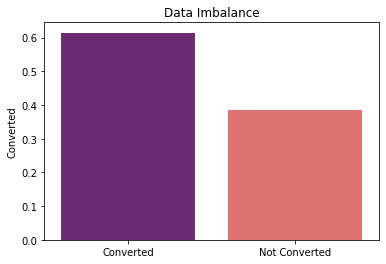

In [34]:
unbalance=pd.DataFrame(leads_df['Converted'].value_counts(normalize=True))
unbalance.index=['Converted','Not Converted']
sns.barplot(data=unbalance, x=unbalance.index, y='Converted', palette='magma')
plt.title("Data Imbalance")
plt.show()

In [35]:
round((leads_df.Converted.value_counts()/leads_df.shape[0])*100,2)

0    61.46
1    38.54
Name: Converted, dtype: float64

In [36]:
leads_df_notconverted=leads_df[leads_df['Converted']==0]
leads_df_converted=leads_df[leads_df['Converted']==1]

### Univariate Analysis

#### Numerical Variables

In [37]:
num_cols=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

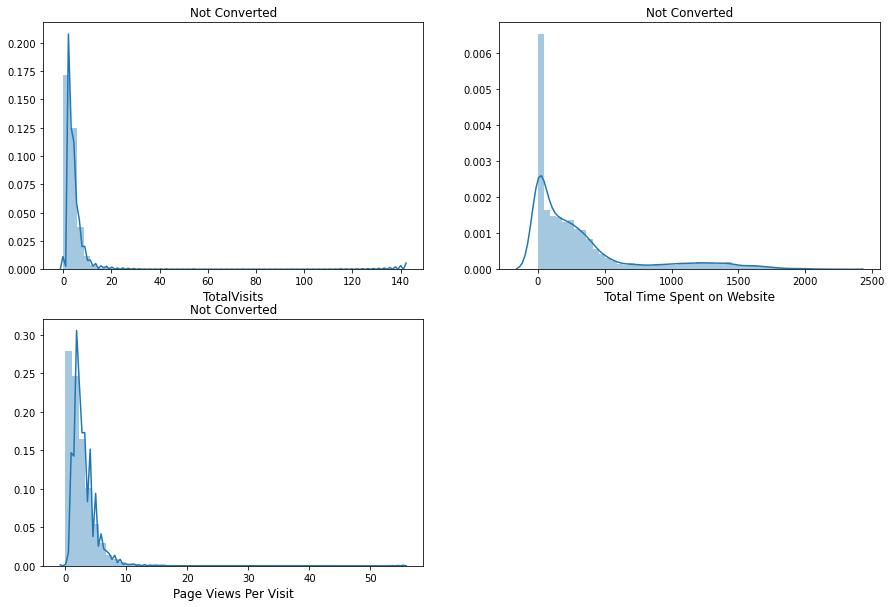

In [38]:
plt.figure(figsize=[15,10])
for i in enumerate(num_cols):
    plt.subplot(2,2,i[0]+1)
    plt.title('Not Converted')
    a=sns.distplot(leads_df_notconverted[i[1]])
    a.set_xlabel(i[1], fontsize=12)

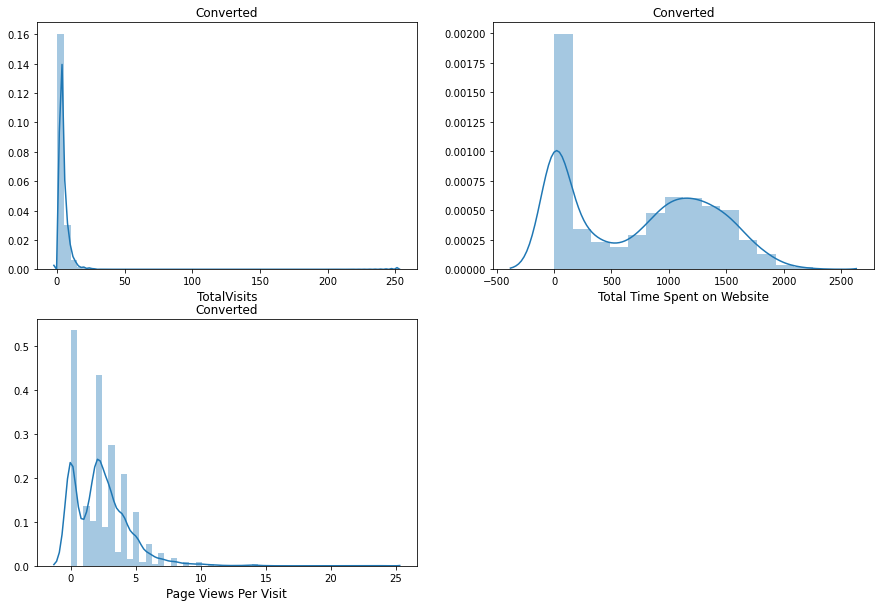

In [39]:
plt.figure(figsize=[15,10])
for i in enumerate(num_cols):
    plt.subplot(2,2,i[0]+1)
    plt.title('Converted')
    a=sns.distplot(leads_df_converted[i[1]])
    a.set_xlabel(i[1], fontsize=12)

<div class="alert alert-block alert-success">
    From the above distribution plots, we can say
        <ul>
            <li> Not Converted ratio of below columns has been found to be highly right skewed: <br>
                'TotalVisits',<br>
                'Total Time Spent on Website',<br>
                'Page Views Per Visit' <br>
            <li> Converted ratio of below columns: <br>
                'Total Time Spent on Website' is slightly right skewed:<br>
                'TotalVisits','Page Views Per Visit' is highly right skewed </li>
        </ul>
</div>

#### Categorical Variables

In [40]:
cat_cols=[]
for i in leads_df.columns:
        if leads_df[i].dtypes=='O':
            cat_cols.append(i)
cat_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

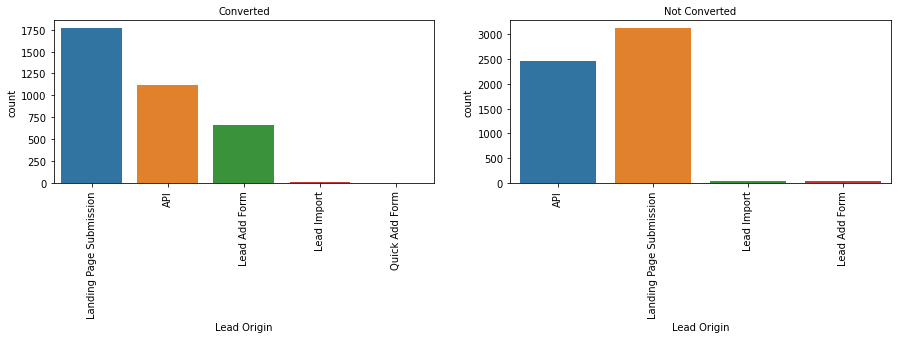

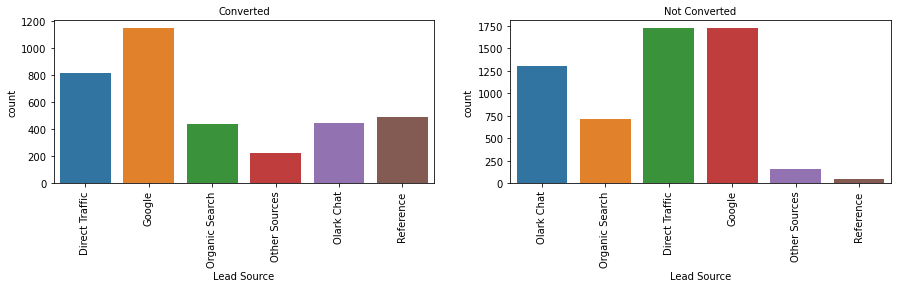

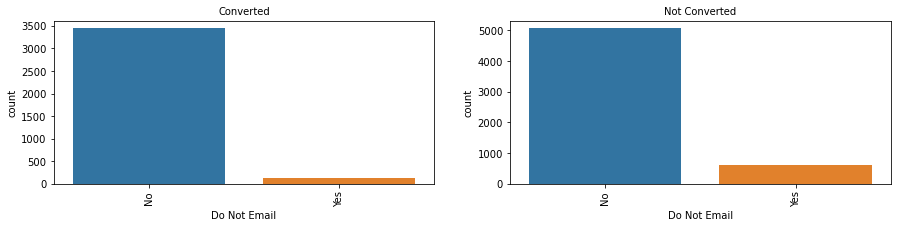

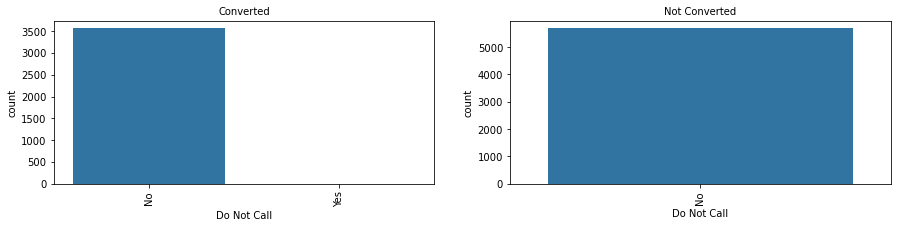

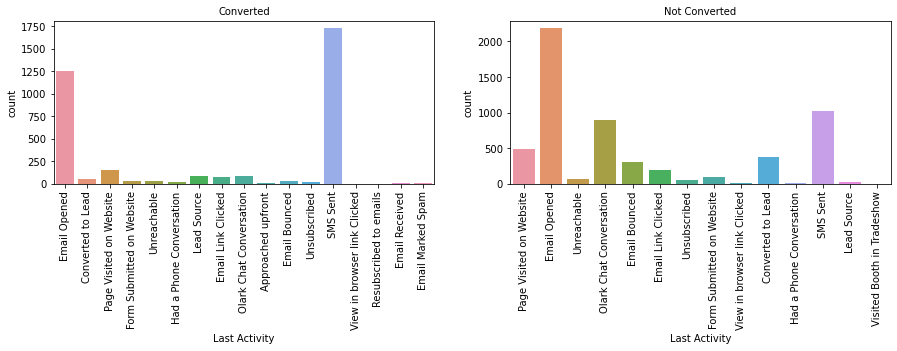

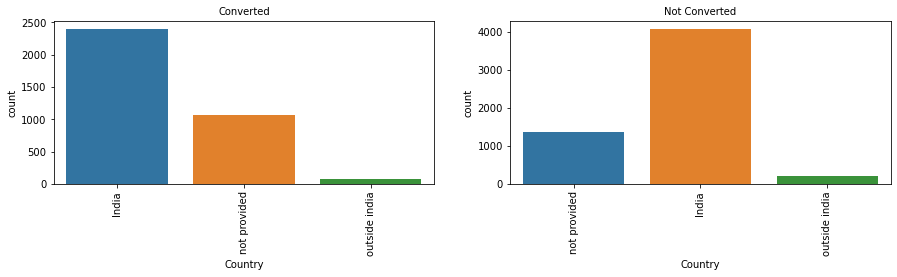

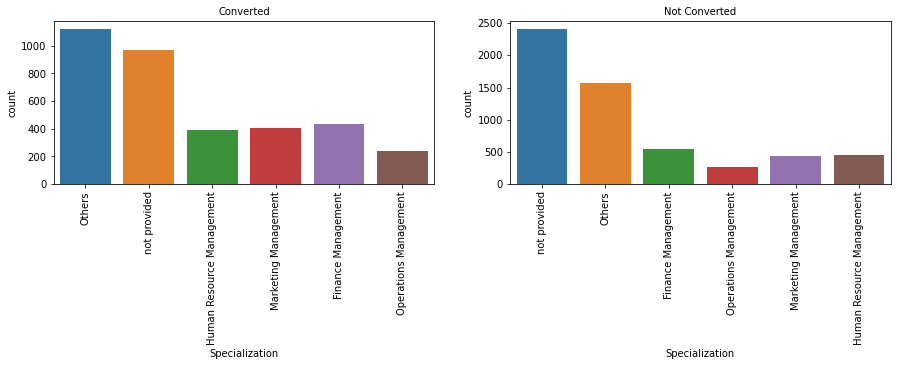

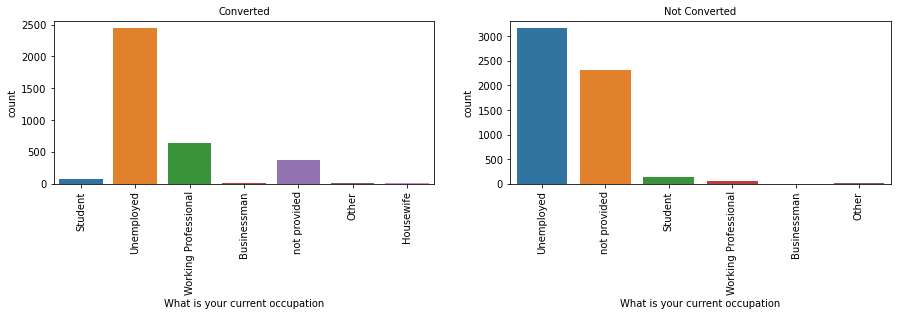

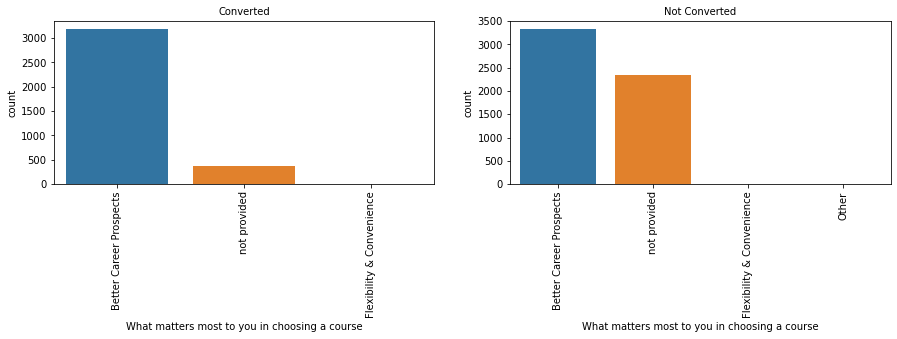

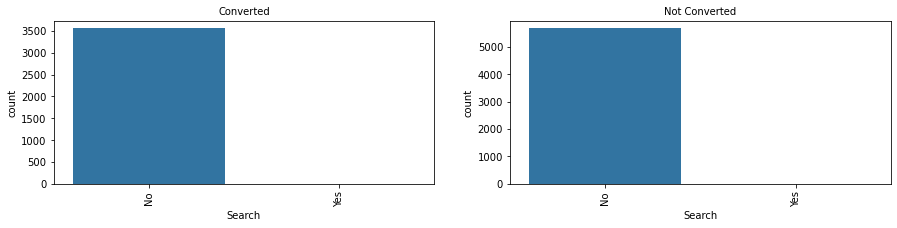

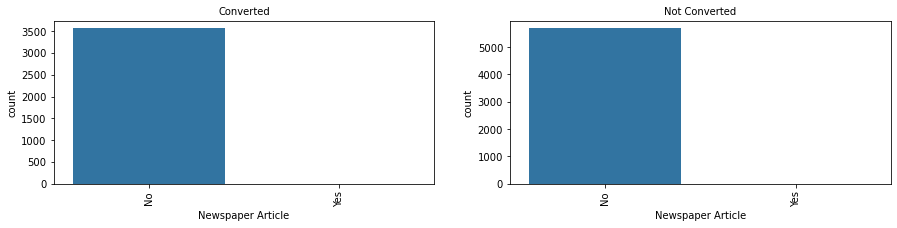

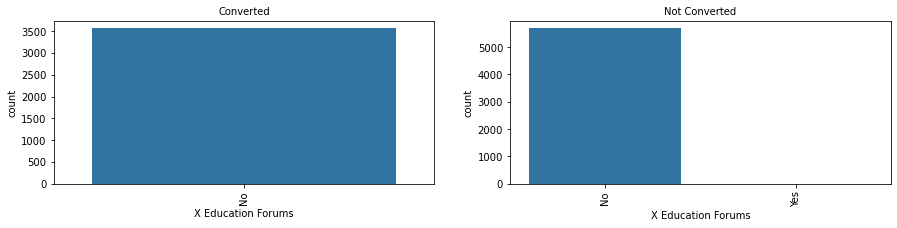

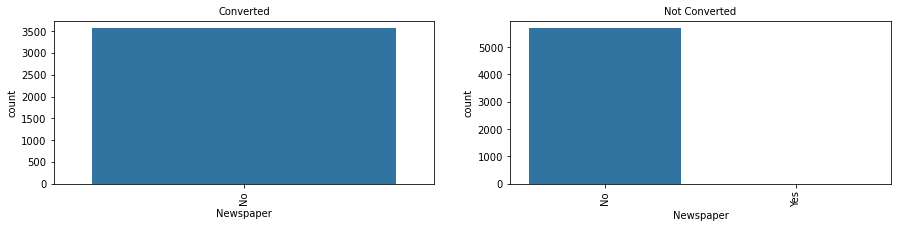

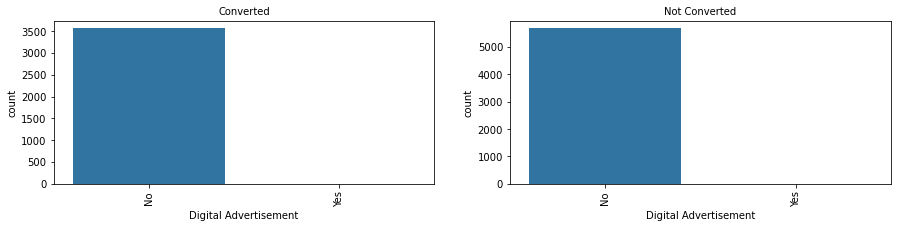

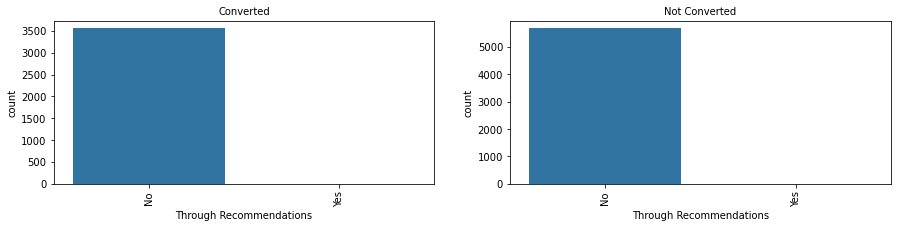

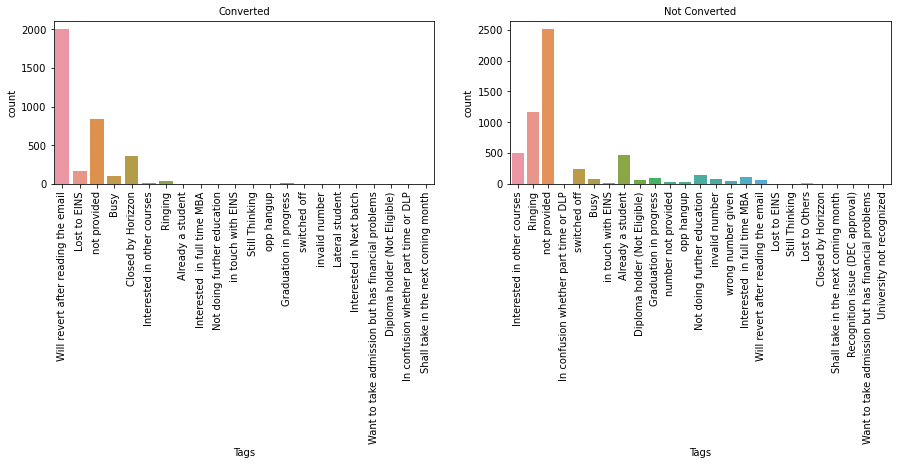

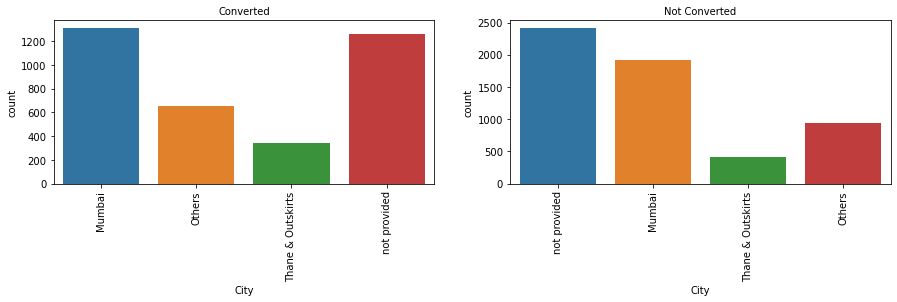

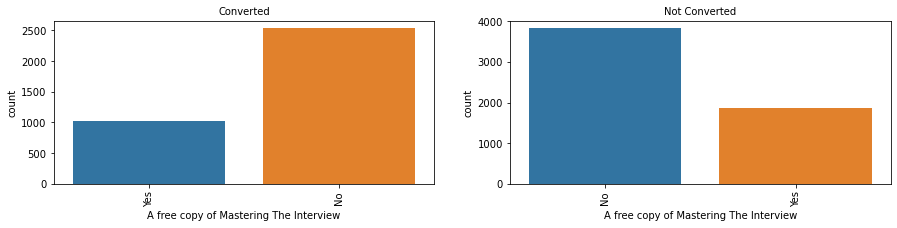

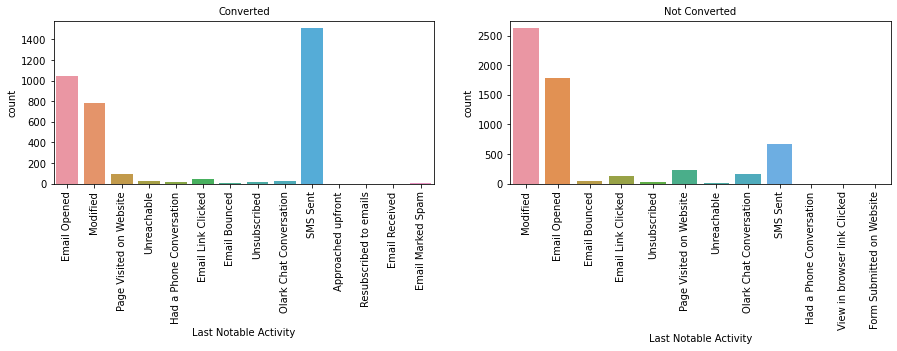

In [41]:
for i in range(len(cat_cols)):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,3))

    ax1=sns.countplot(ax=ax1,x=cat_cols[i],data=leads_df_converted)
    ax1.set_title('Converted', fontdict={'fontsize' : 10, 'fontweight' : 3}) 
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90, fontsize=10)

    ax2=sns.countplot(ax=ax2,x=cat_cols[i],data=leads_df_notconverted)
    ax2.set_title('Not Converted', fontdict={'fontsize' : 10, 'fontweight' : 3}) 
    ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90, fontsize=10)
    plt.show()

<div class="alert alert-block alert-success">
    From the above plots, we can get the high-level idea of the below independent variables impacting the target variable (Converted).
        <ul>
            <li>'Lead Origin',<br>'Lead Source',<br>'specialization',<br>'Tags',<br>'Last Activity' <br>
    Will be discussed in detail in next section.</li>
        </ul>
</div>

### Bi-Variate Analysis

#### Continuous - Continuous Variables

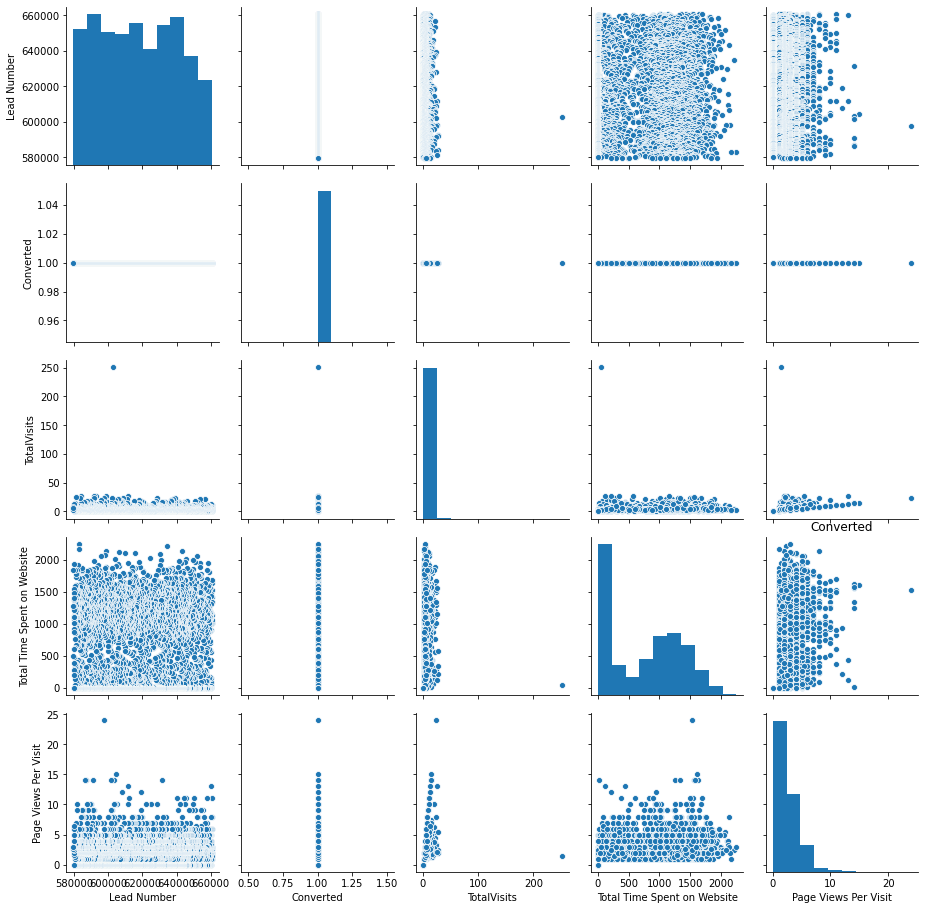

In [42]:
a=sns.pairplot(leads_df_converted)
plt.title('Converted')
plt.show()

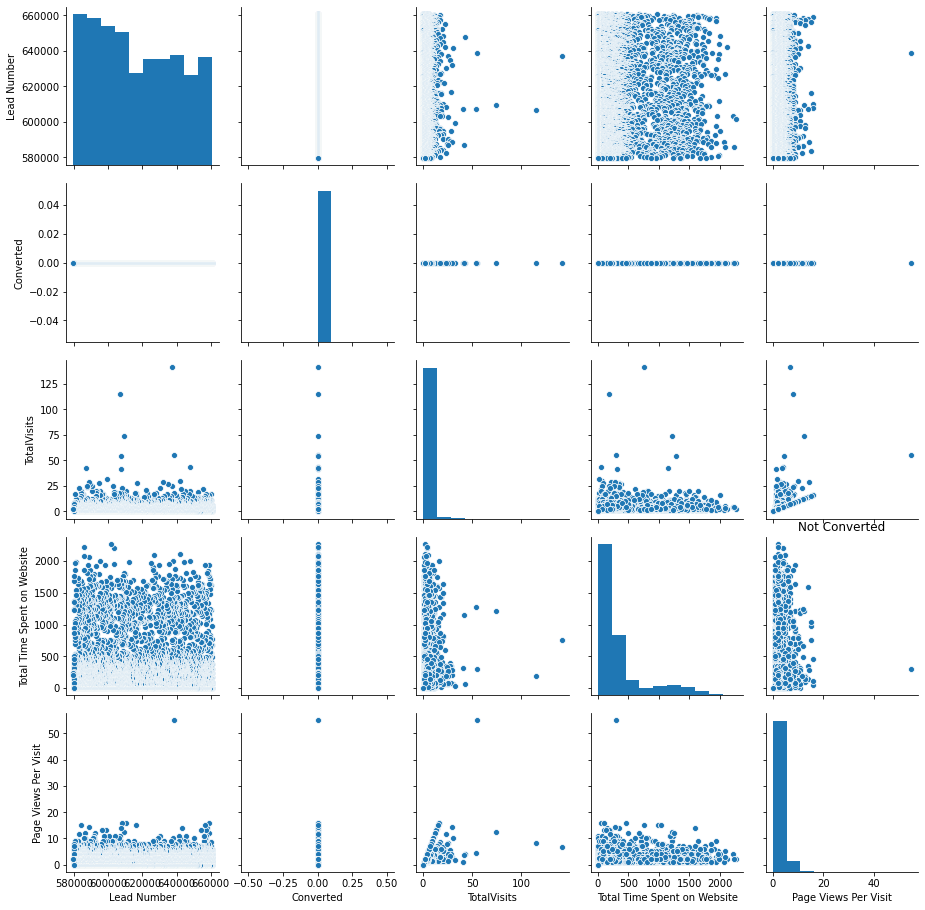

In [43]:
a=sns.pairplot(leads_df_notconverted)
plt.title('Not Converted')
plt.show()

<div class="alert alert-block alert-success">
        <ul>
            <li>Total Visits have some correlation with Page Views Per Visit</li>
            <li>Total Time Spent on Website has a very slight correlation with Page VIews Per Visit
        </ul>
</div>

#### Categorical - Categorical Variables

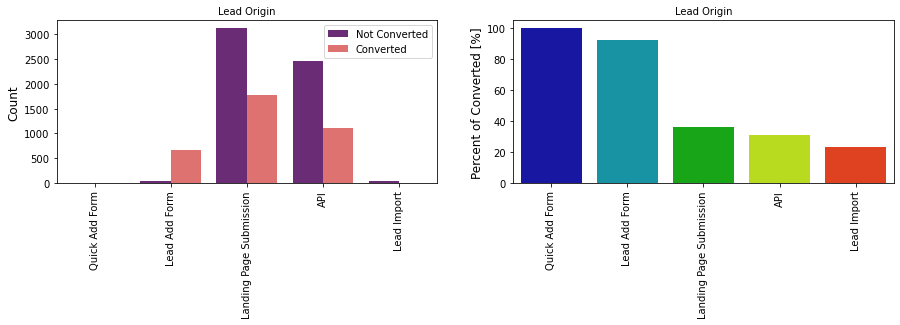

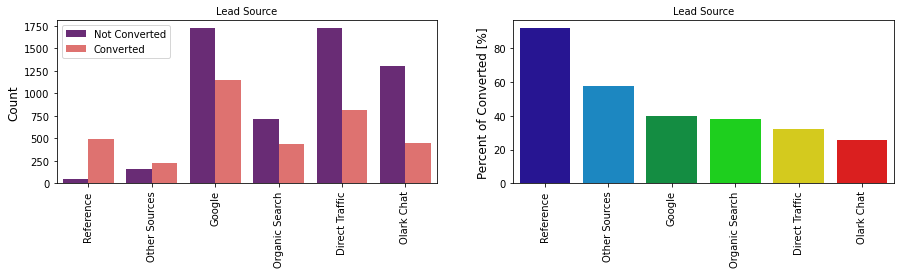

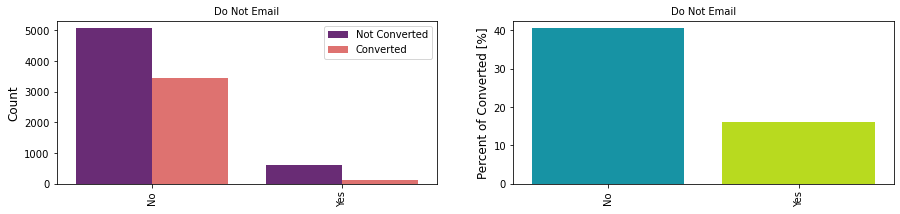

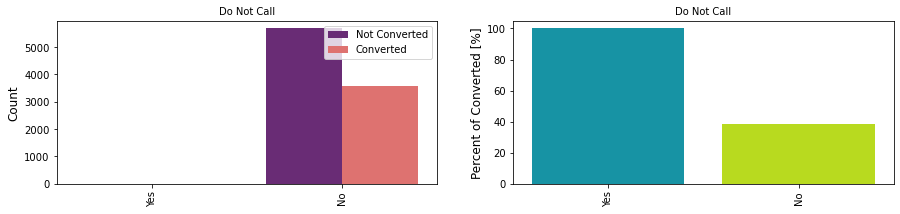

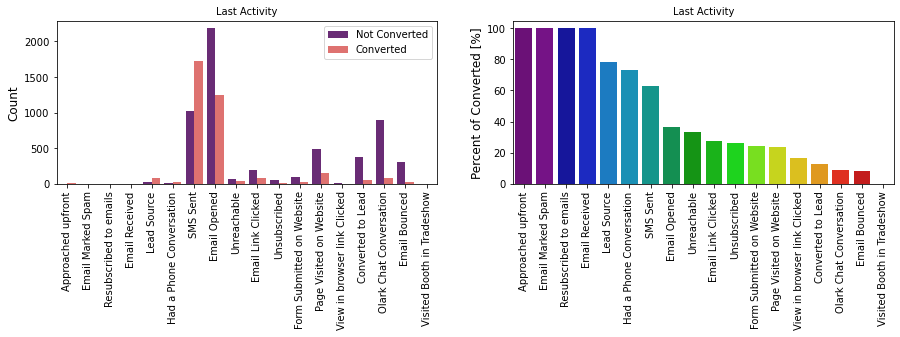

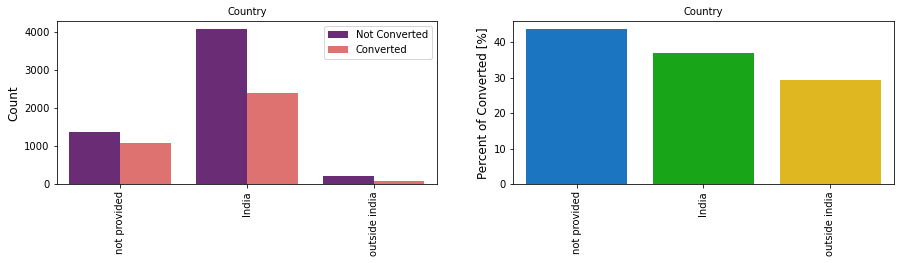

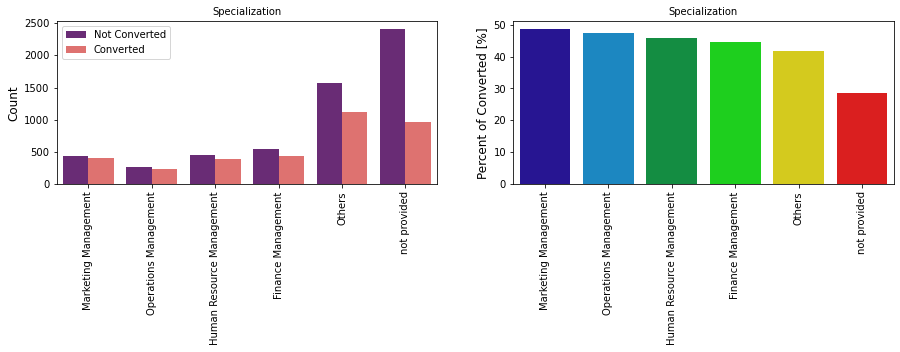

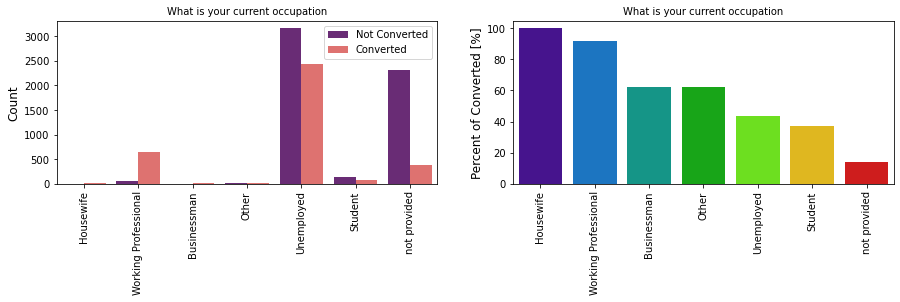

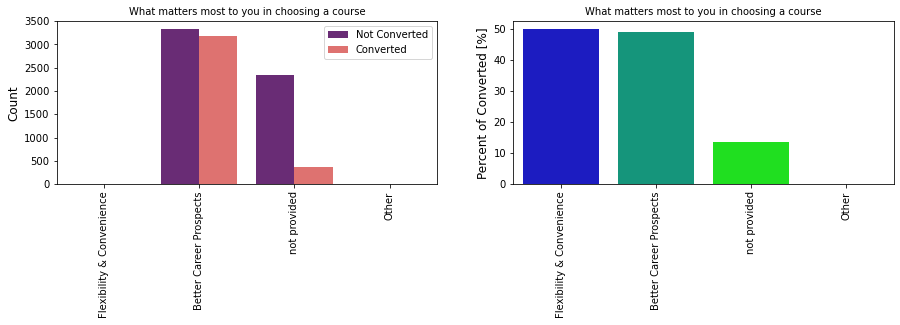

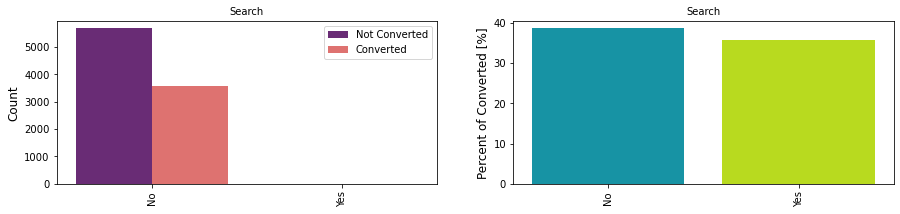

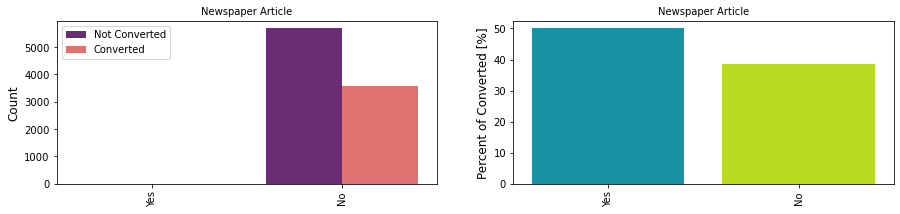

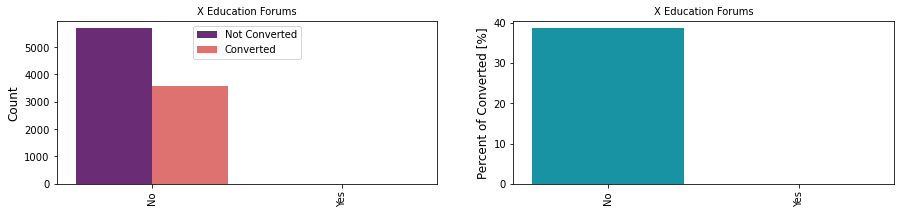

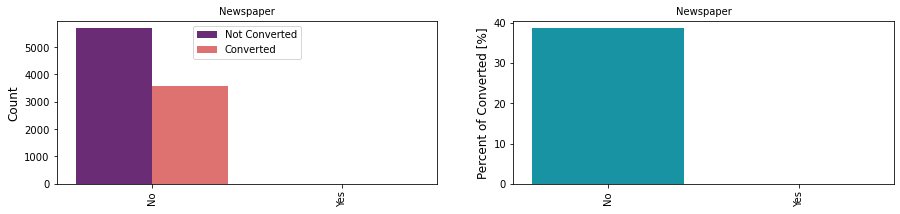

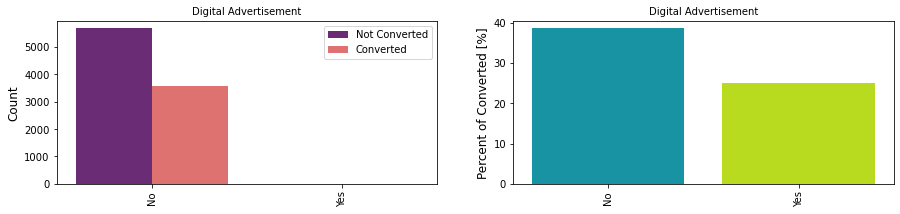

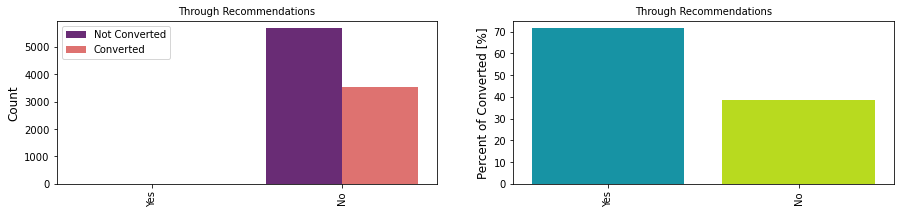

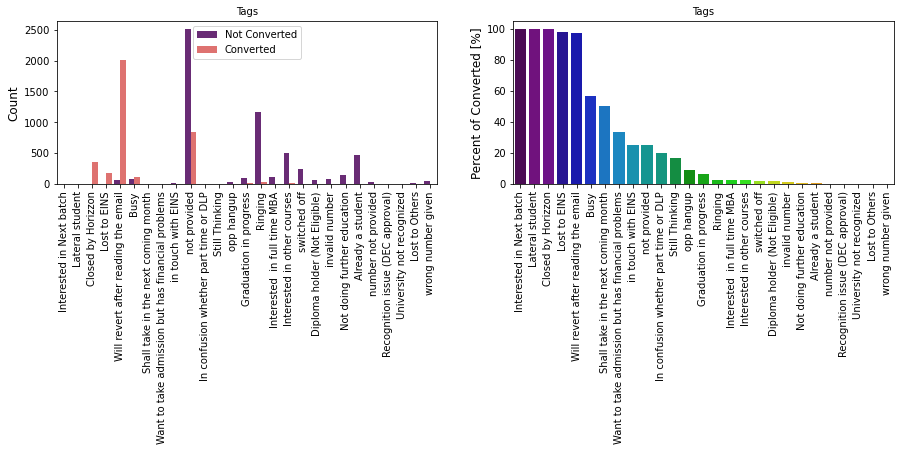

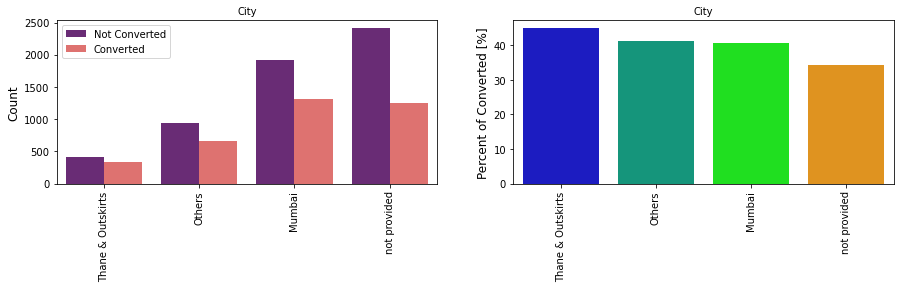

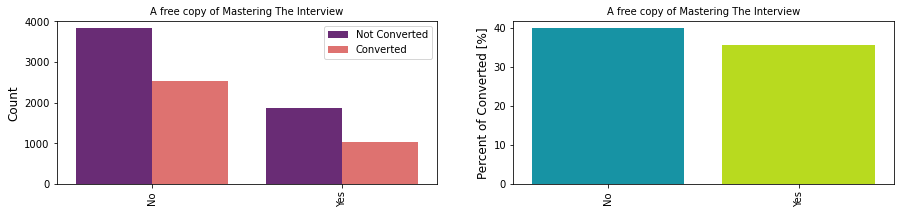

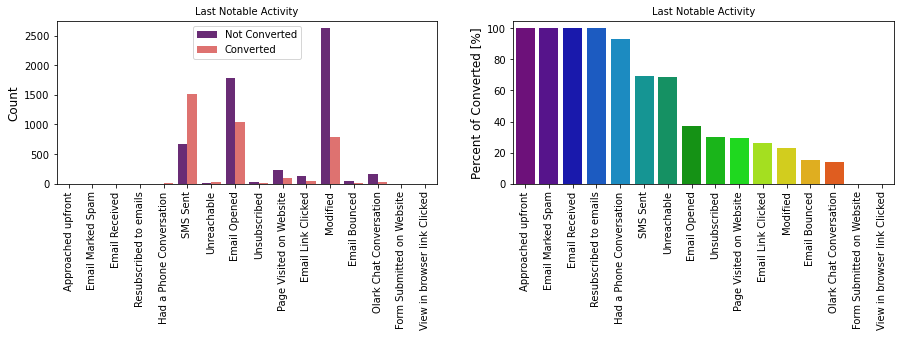

In [44]:
for i in range(len(cat_cols)):
    
    cat_perc = leads_df[[cat_cols[i], 'Converted']].groupby(cat_cols[i],as_index=False).mean()
    cat_perc["Converted"] = cat_perc["Converted"]*100 
    cat_perc.sort_values(by='Converted', ascending=False, inplace=True)
 
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,3)) 
    # 1. Plotting the Counts of the Categorical Values (WITHOUT TARGET)
    ax1=sns.countplot(ax=ax1,x =cat_cols[i], 
                          data=leads_df,
                          hue ="Converted",
                          order=cat_perc[cat_cols[i]],
                          palette='magma')

    ax1.set_title(cat_cols[i], fontdict={'fontsize' : 10, 'fontweight' : 3}) 
    ax1.legend(['Not Converted','Converted'])
    ax1.set_ylabel('Count', fontsize=12)
    ax1.set_xlabel('')
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90, fontsize=10)

    # 2. Plotting Percentage of comverted in the categorical column (WITH TARGET)
    ax2=sns.barplot(ax=ax2,x = cat_cols[i], 
                    y='Converted', 
                    order=cat_perc[cat_cols[i]], 
                    data=cat_perc,
                    palette='nipy_spectral')
    ax2.set_title(cat_cols[i], fontdict={'fontsize' : 10, 'fontweight' : 3}) 
    ax2.set_ylabel('Percent of Converted [%]', fontsize=12)
    ax2.set_xlabel('')
    ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90, fontsize=10)
    plt.show()

## Inferences based on Uni and Bi-Variate Analysis

### Let us understand 5 columns that we found important from the plots in previous section

### 1) Lead Origin

In [45]:
# Plotting w.r.t self as well as target variable
def uni_analysis(data,x,heading):
    plt.figure(figsize=(15, 5))
    sns.countplot(data=data,x=x,order = data[x].value_counts().index)
    plt.title(heading+'%')
    if len(data.columns)>=90:
        plt.xticks(rotation=90)
    else:
        plt.xticks(rotation=45)
    plt.ylabel(heading)

def bi_analysis(data,x,y,hue,heading):
    plt.figure(figsize=(15, 5))
    sns.barplot(data=convert,x=x,y='count',hue=hue)
    plt.xlabel(heading)
    if len(data.columns)>=3:
        plt.xticks(rotation=90)
    else:
        plt.xticks(rotation=45)
    plt.ylabel('Count of Prospects')

    plt.subplots_adjust(hspace=.1)
    plt.show()

In [46]:
convert=leads_df.groupby(['Converted','Lead Origin'])['Converted'].count().reset_index(name='count')
convert

,Converted,Lead Origin,count
0,0,API,2465
1,0,Landing Page Submission,3118
2,0,Lead Add Form,54
3,0,Lead Import,42
4,1,API,1115
5,1,Landing Page Submission,1768
6,1,Lead Add Form,664
7,1,Lead Import,13
8,1,Quick Add Form,1


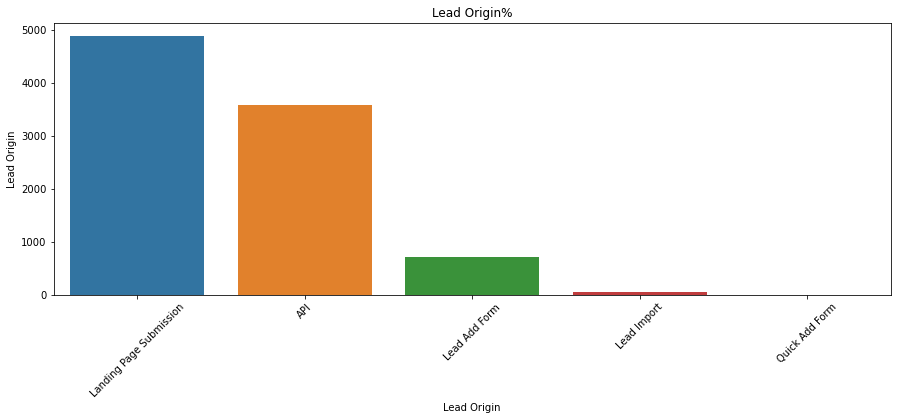

In [47]:
uni_analysis(leads_df,'Lead Origin','Lead Origin')

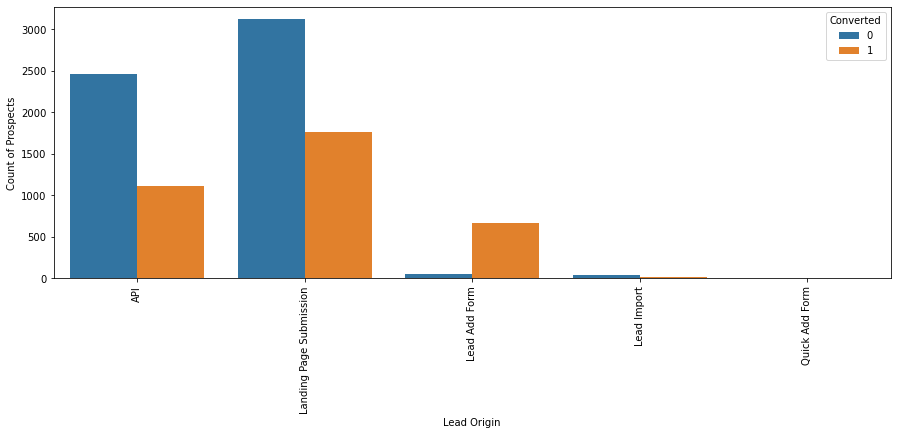

In [48]:
bi_analysis(convert,'Lead Origin','count','Converted','Lead Origin')

In [49]:
# Checking unique value 
round(leads_df['Lead Origin'].value_counts(normalize=True),2).reset_index()

,index,Lead Origin
0,Landing Page Submission,0.53
1,API,0.39
2,Lead Add Form,0.08
3,Lead Import,0.01
4,Quick Add Form,0.00


In [50]:
round(pd.crosstab(leads_df['Lead Origin'],leads_df['Converted']).apply(lambda x:x/x.sum(),axis=1),2)

Converted,0,1
Lead Origin,,
API,0.69,0.31
Landing Page Submission,0.64,0.36
Lead Add Form,0.08,0.92
Lead Import,0.76,0.24
Quick Add Form,0.00,1.00



#### From the above Univariate Analysis states that almost 53% of the Lead Origin is from 'Landing Page Submission' followed by 39% from API 
#### Bivariate Analysis states that 'Lead Add Form' has 92% , 'Landing Page Submission' has 36% of Conversion and 'API' has 31% of Conversion. All calculations shown above.


### 2) Lead Source

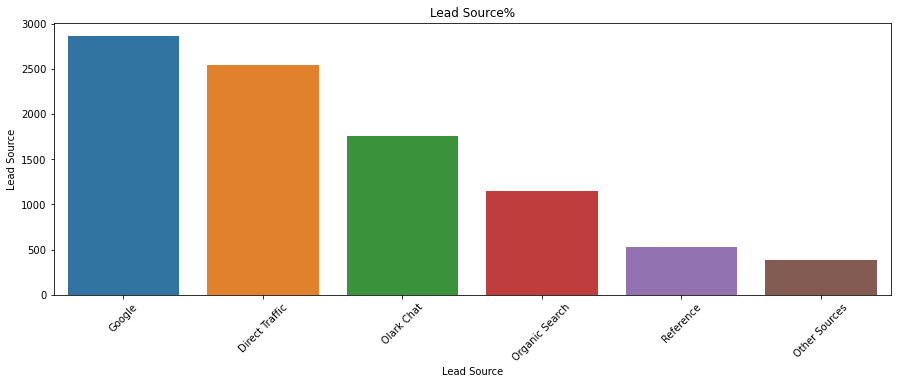

In [51]:
uni_analysis(leads_df,'Lead Source','Lead Source')

In [52]:
convert=leads_df.groupby(['Converted','Lead Source'])['Converted'].count().reset_index(name='count')
convert

,Converted,Lead Source,count
0,0,Direct Traffic,1725
1,0,Google,1721
2,0,Olark Chat,1307
3,0,Organic Search,718
4,0,Other Sources,164
5,0,Reference,44
6,1,Direct Traffic,818
7,1,Google,1147
8,1,Olark Chat,448
9,1,Organic Search,436


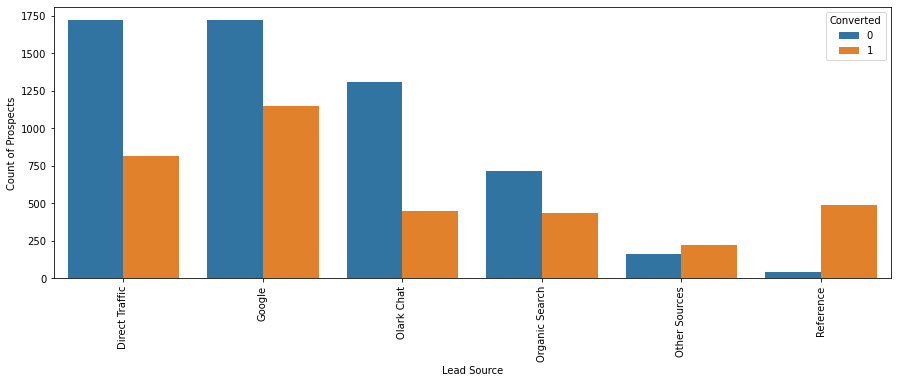

In [53]:
bi_analysis(convert,'Lead Source','count','Converted','Lead Source')

In [54]:
# Checking unique value 
round(leads_df['Lead Source'].value_counts(normalize=True),3).reset_index()

,index,Lead Source
0,Google,0.310
1,Direct Traffic,0.275
2,Olark Chat,0.190
3,Organic Search,0.125
4,Reference,0.058
5,Other Sources,0.042


In [55]:
round(pd.crosstab(leads_df['Lead Source'],leads_df['Converted']).apply(lambda x:x/x.sum(),axis=1),2)

Converted,0,1
Lead Source,,
Direct Traffic,0.68,0.32
Google,0.60,0.40
Olark Chat,0.74,0.26
Organic Search,0.62,0.38
Other Sources,0.42,0.58
Reference,0.08,0.92



#### Univariate Analysis says 31% of the Lead Source is from 'Google' followed by 28% from 'Direct Traffic' 

#### Bivariate Analysis states that 'Reference' has a conversion of 92%, 'Google' as a Lead Source has 40% of Conversion and 'Direct Traffic' has 32% of Conversion. All calculations are shown above.


### 3) Specialization


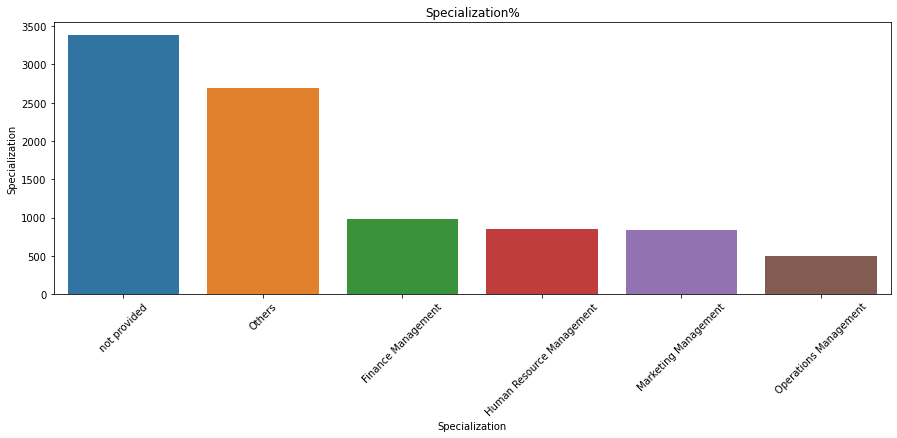

In [56]:
uni_analysis(leads_df,'Specialization','Specialization')

In [57]:
convert=leads_df.groupby(['Converted','Specialization'])['Converted'].count().reset_index(name='count')
convert

,Converted,Specialization,count
0,0,Finance Management,540
1,0,Human Resource Management,460
2,0,Marketing Management,430
3,0,Operations Management,265
4,0,Others,1573
5,0,not provided,2411
6,1,Finance Management,436
7,1,Human Resource Management,388
8,1,Marketing Management,408
9,1,Operations Management,238


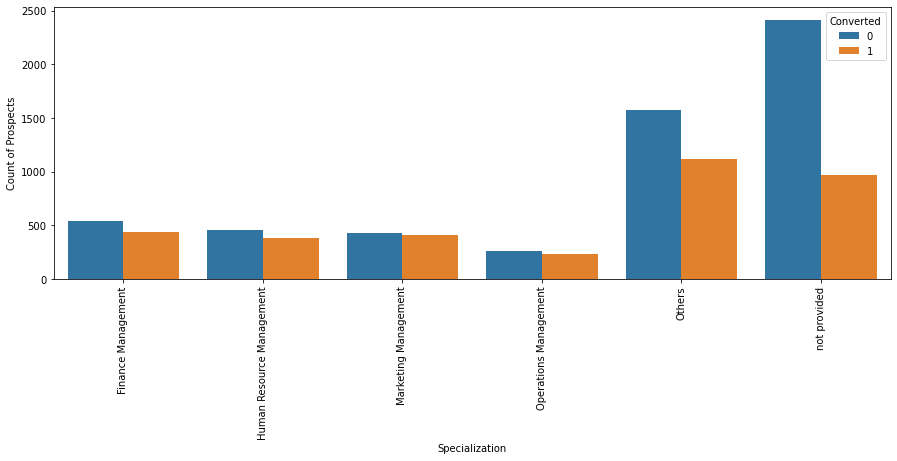

In [58]:
bi_analysis(convert,'Specialization','count','Converted','Specialization')

In [59]:
#Checking unique values 

round(leads_df['Specialization'].value_counts(normalize=True),3).sort_values(ascending = False)

not provided                 0.366
Others                       0.292
Finance Management           0.106
Human Resource Management    0.092
Marketing Management         0.091
Operations Management        0.054
Name: Specialization, dtype: float64

In [60]:
round(pd.crosstab(leads_df['Specialization'],leads_df['Converted']).apply(lambda x:x/x.sum(),axis=1),2)

Converted,0,1
Specialization,,
Finance Management,0.55,0.45
Human Resource Management,0.54,0.46
Marketing Management,0.51,0.49
Operations Management,0.53,0.47
Others,0.58,0.42
not provided,0.71,0.29



##### Univariate Analysis says for Specialization around 36% people not selected and around 28% chose 'others' category.

##### Bivariate Analysis says that  49% of  converted  people selected 'Marketing Management'  followed by 'Operations Management' with 47% of Conversion. All calculations shown above.


### 4) Tags

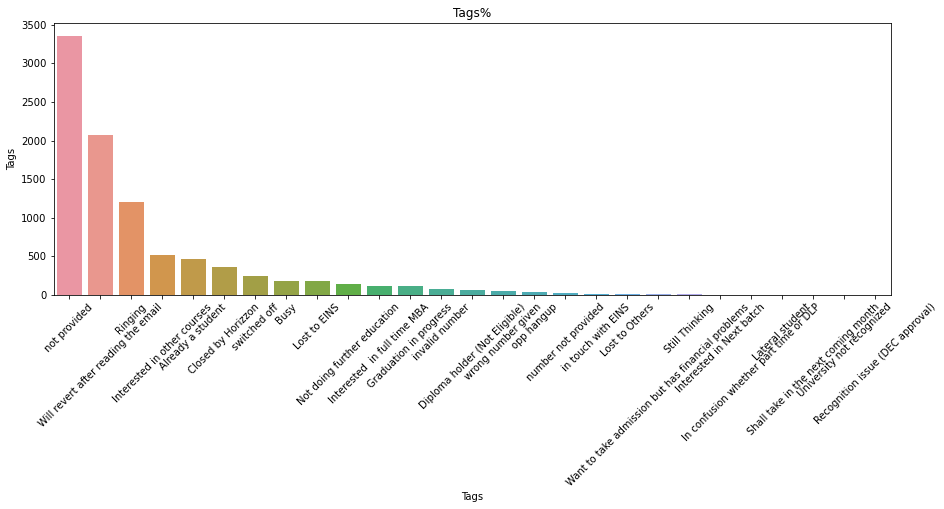

In [61]:
uni_analysis(leads_df,'Tags','Tags')

In [62]:
convert=leads_df.groupby(['Converted','Tags'])['Converted'].count().reset_index(name='count')
convert

,Converted,Tags,count
0,0,Already a student,462
1,0,Busy,81
2,0,Closed by Horizzon,2
3,0,Diploma holder (Not Eligible),62
4,0,Graduation in progress,104
5,0,In confusion whether part time or DLP,4
6,0,Interested in full time MBA,114
7,0,Interested in other courses,500
8,0,Lost to EINS,4
9,0,Lost to Others,7


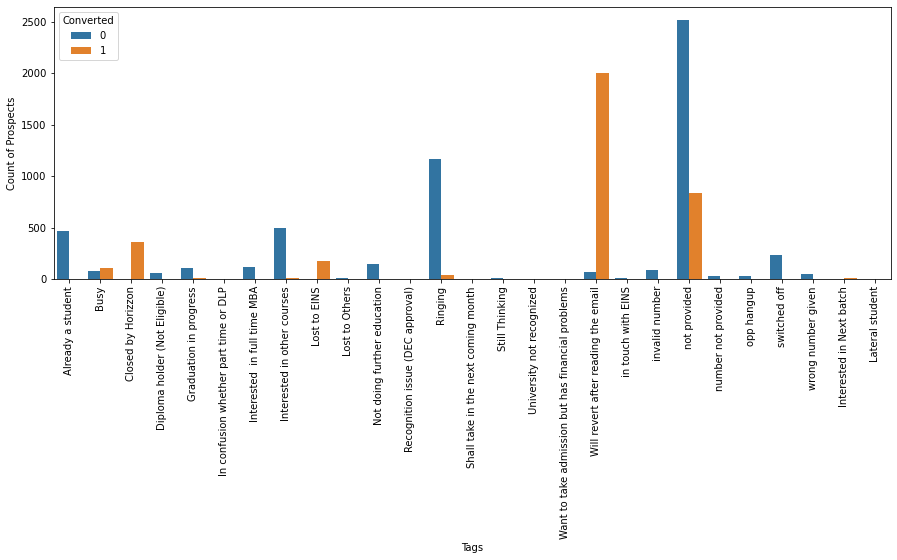

In [63]:
bi_analysis(convert,'Tags','count','Converted','Tags')

In [64]:
#Checking unique values 
round(leads_df['Tags'].value_counts(normalize=True),3).sort_values(ascending = False)

not provided                                         0.363
Will revert after reading the email                  0.224
Ringing                                              0.130
Interested in other courses                          0.056
Already a student                                    0.050
Closed by Horizzon                                   0.039
switched off                                         0.026
Busy                                                 0.020
Lost to EINS                                         0.019
Not doing further education                          0.016
Interested  in full time MBA                         0.013
Graduation in progress                               0.012
invalid number                                       0.009
Diploma holder (Not Eligible)                        0.007
wrong number given                                   0.005
opp hangup                                           0.004
number not provided                                  0.0

In [65]:
round(pd.crosstab(leads_df['Tags'],leads_df['Converted']).apply(lambda x:x/x.sum(),axis=1),2)

Converted,0,1
Tags,,
Already a student,0.99,0.01
Busy,0.44,0.56
Closed by Horizzon,0.01,0.99
Diploma holder (Not Eligible),0.98,0.02
Graduation in progress,0.94,0.06
In confusion whether part time or DLP,0.80,0.20
Interested in full time MBA,0.97,0.03
Interested in Next batch,0.00,1.00
Interested in other courses,0.97,0.03


##### Univariate Analysis says for 'Tags' around 36% information was not provided and around 22% peaople said 'Will revert after reading the email'

##### Bivariate Analysis says that  peaople who said 'Interested in Next batch' and 'Lateral student' were converted around 20%. All calculations shown above.


### 5) Last Activity

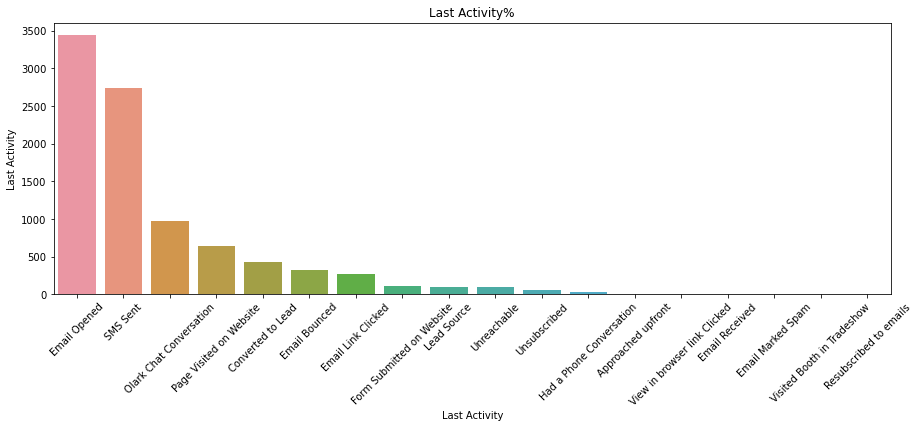

In [66]:
uni_analysis(leads_df,'Last Activity','Last Activity')

In [67]:
convert=leads_df.groupby(['Converted','Last Activity'])['Converted'].count().reset_index(name='count')
convert

,Converted,Last Activity,count
0,0,Converted to Lead,374
1,0,Email Bounced,300
2,0,Email Link Clicked,194
3,0,Email Opened,2184
4,0,Form Submitted on Website,88
5,0,Had a Phone Conversation,8
6,0,Lead Source,22
7,0,Olark Chat Conversation,889
8,0,Page Visited on Website,489
9,0,SMS Sent,1018


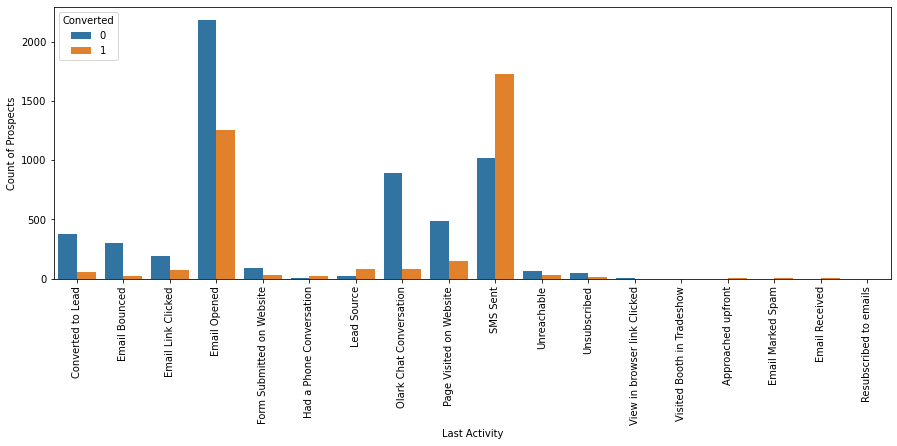

In [68]:
bi_analysis(convert,'Last Activity','count','Converted','Last Activity')

In [69]:
#Checking unique values 
round(leads_df['Last Activity'].value_counts(normalize=True),3).sort_values(ascending = False)

Email Opened                    0.372
SMS Sent                        0.297
Olark Chat Conversation         0.105
Page Visited on Website         0.069
Converted to Lead               0.046
Email Bounced                   0.035
Email Link Clicked              0.029
Form Submitted on Website       0.013
Lead Source                     0.011
Unreachable                     0.010
Unsubscribed                    0.007
Had a Phone Conversation        0.003
Approached upfront              0.001
View in browser link Clicked    0.001
Visited Booth in Tradeshow      0.000
Email Received                  0.000
Email Marked Spam               0.000
Resubscribed to emails          0.000
Name: Last Activity, dtype: float64

In [70]:
round(pd.crosstab(leads_df['Last Activity'],leads_df['Converted']).apply(lambda x:x/x.sum(),axis=1),2)

Converted,0,1
Last Activity,,
Approached upfront,0.00,1.00
Converted to Lead,0.87,0.13
Email Bounced,0.92,0.08
Email Link Clicked,0.73,0.27
Email Marked Spam,0.00,1.00
Email Opened,0.64,0.36
Email Received,0.00,1.00
Form Submitted on Website,0.76,0.24
Had a Phone Conversation,0.27,0.73


##### Univariate Analysis says for 'Last Activity' around 37% customers were 'Email Opened' and around 30% customers were 'sent SMS' also.

##### Bivariate Analysis says that  customers categories includes 'Approached upfront', 'Email Marked Spam', 'Email Received', 'Resubscribed to emails' were converted around 40%.

### Multivariate Analysis

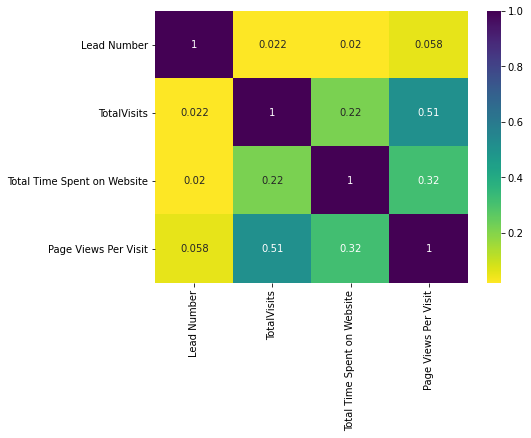

In [71]:
corr_lead=leads_df.drop('Converted',1).corr()
plt.figure(figsize=[7,5])
sns.heatmap(corr_lead, annot=True, cmap='viridis_r')
plt.show()

<div class="alert alert-block alert-success">
    Above Multivariate heatmap says 
        <ul>
            <li>'Page Views Per Visit' and 'TotalVisits' were moderately correlated (0.51)</li>
        </ul>
</div>

# 5. Outlier Detection

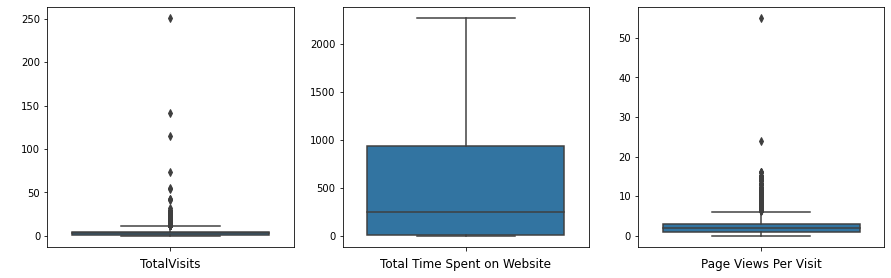

In [72]:
plt.subplots(figsize=[15,15])
for i in range(len(num_cols)):
    plt.subplot(3,3,i+1)
    a=sns.boxplot(data=leads_df,x=num_cols[i], orient='v')
    a.set_xlabel(num_cols[i], fontsize=12)
    a.set_ylabel(' ')

<div class="alert alert-block alert-success">
        <ul>
            <li>2 columns with outliers identified: TotalVisits & Page Views Per Visit</li>
        </ul>
</div>

In [73]:
# Checking statistical summary of TotalVisits
round(leads_df['TotalVisits'].describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95,0.99,1]),2).reset_index()

,index,TotalVisits
0,count,9240.00
1,mean,3.45
2,std,4.82
3,min,0.00
4,10%,0.00
5,25%,1.00
6,50%,3.00
7,75%,5.00
8,90%,7.00
9,95%,10.00


In [74]:
np.median(leads_df['TotalVisits'])

3.0

In [75]:
# Capping the outlier till Q3 (95%)
leads_df.loc[leads_df['TotalVisits'] >= 10, 'TotalVisits'] = np.median(leads_df['TotalVisits'])

In [76]:
round(leads_df['Page Views Per Visit'].describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95,0.99,1]),2).reset_index()

,index,Page Views Per Visit
0,count,9240.00
1,mean,2.36
2,std,2.15
3,min,0.00
4,10%,0.00
5,25%,1.00
6,50%,2.00
7,75%,3.00
8,90%,5.00
9,95%,6.00


In [77]:
# Capping the outlier till Q4 (99%)
leads_df.loc[leads_df['Page Views Per Visit'] > 6, 'Page Views Per Visit'] = np.median(leads_df['Page Views Per Visit'])

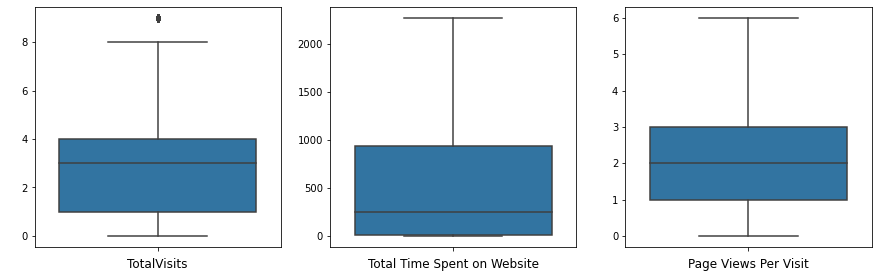

In [78]:
plt.subplots(figsize=[15,15])
for i in range(len(num_cols)):
    plt.subplot(3,3,i+1)
    a=sns.boxplot(data=leads_df,x=num_cols[i], orient='v')
    a.set_xlabel(num_cols[i], fontsize=12)
    a.set_ylabel(' ')

In [79]:
leads_df.shape

(9240, 24)

<div class="alert alert-block alert-success">
        <ul>
            <li> <b> Replaced the outliers with Median values for the 2 columns - TotalVisits and Page View Per Visit</li>
        </ul>
</div>

# 6. Prepare the data for modelling

### Remove Sales Team Generated Data as these variables will not be available when we create the model

<ol>
            <li> Lead Profile                                   
            <li> Lead Quality                                   
            <li> Asymmetrique Profile Score
            <li> Asymmetrique Activity Score                    
            <li> Asymmetrique Profile Index                 
            <li> Asymmetrique Activity Index                
            <li> Tags                          
            <li> Last Activity
            <li> Last Notable Activity
</ol>
<b> First 6 were removed while handling missing values. So, now we remove the last 3 columns
        

In [80]:
leads_df.drop(['Last Activity','Last Notable Activity','Tags'], axis=1, inplace=True)

In [81]:
cat_cols=[]
for i in leads_df.columns:
        if leads_df[i].dtypes=='O':
            cat_cols.append(i)
cat_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'City',
 'A free copy of Mastering The Interview']

In [82]:
leads_df.shape

(9240, 21)

### Dummy Variables

#### Before proceeding for dummy variables, let us check the Categorical columns value counts once more

In [83]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9240 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9240 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9240 non-null   float64
 9   Country                                        9240 

In [84]:
dummy=pd.get_dummies(leads_df[cat_cols], drop_first=True)
dummy.shape

(9240, 37)

In [85]:
final_leads_df=pd.concat([leads_df,dummy],axis=1)
final_leads_df.shape

(9240, 58)

In [86]:
final_leads_df.drop(cat_cols,axis=1,inplace=True)
final_leads_df.shape

(9240, 42)

In [87]:
final_leads_df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Do Not Email_Yes,Do Not Call_Yes,Country_not provided,Country_outside india,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others,Specialization_not provided,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_not provided,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,City_Others,City_Thane & Outskirts,City_not provided,A free copy of Mastering The Interview_Yes
0,660737,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,660727,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,660719,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [88]:
final_leads_df.dtypes

Lead Number                                                                  int64
Converted                                                                    int64
TotalVisits                                                                float64
Total Time Spent on Website                                                  int64
Page Views Per Visit                                                       float64
Lead Origin_Landing Page Submission                                          uint8
Lead Origin_Lead Add Form                                                    uint8
Lead Origin_Lead Import                                                      uint8
Lead Origin_Quick Add Form                                                   uint8
Lead Source_Google                                                           uint8
Lead Source_Olark Chat                                                       uint8
Lead Source_Organic Search                                                   uint8
Lead

#### Let us check correlations

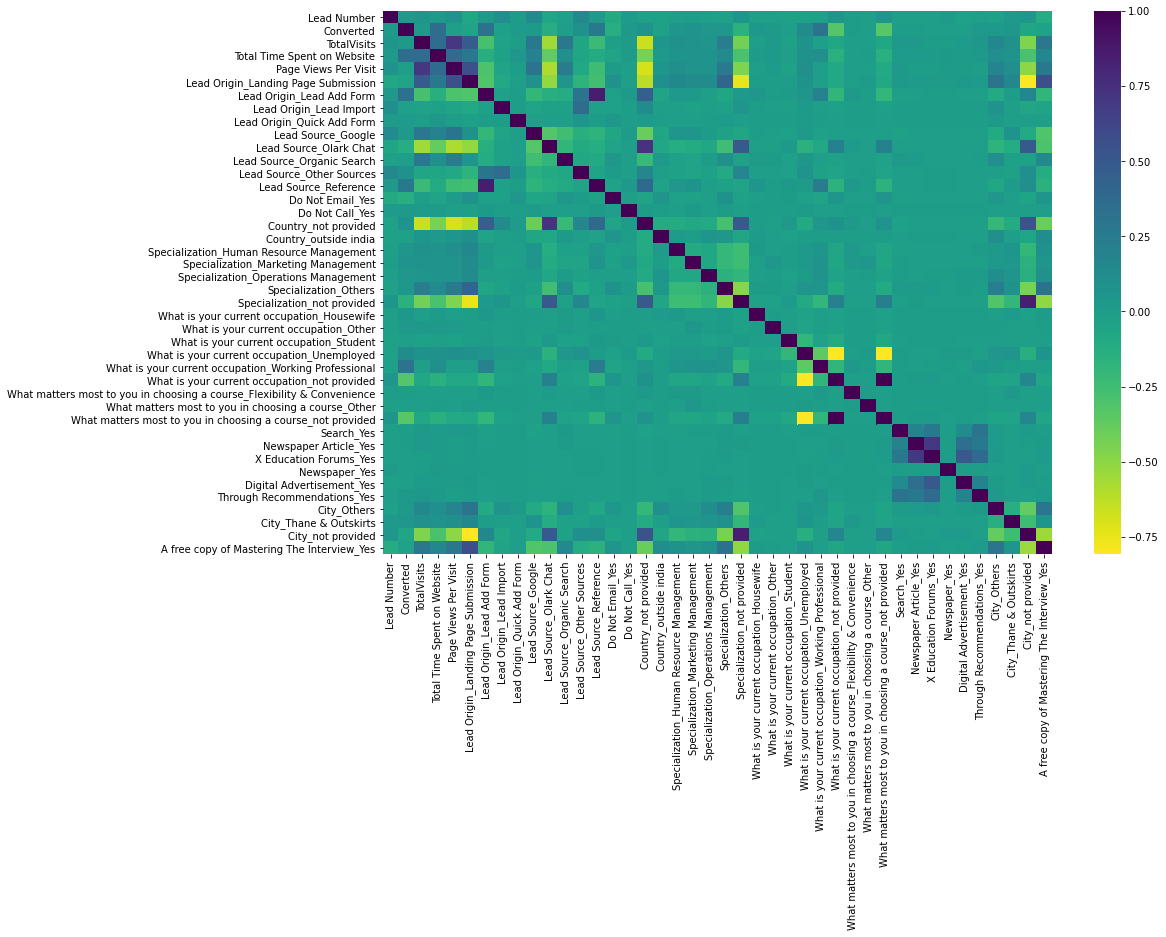

In [89]:
plt.figure(figsize=[15,10])
sns.heatmap(final_leads_df.corr(),cmap='viridis_r')
plt.show()

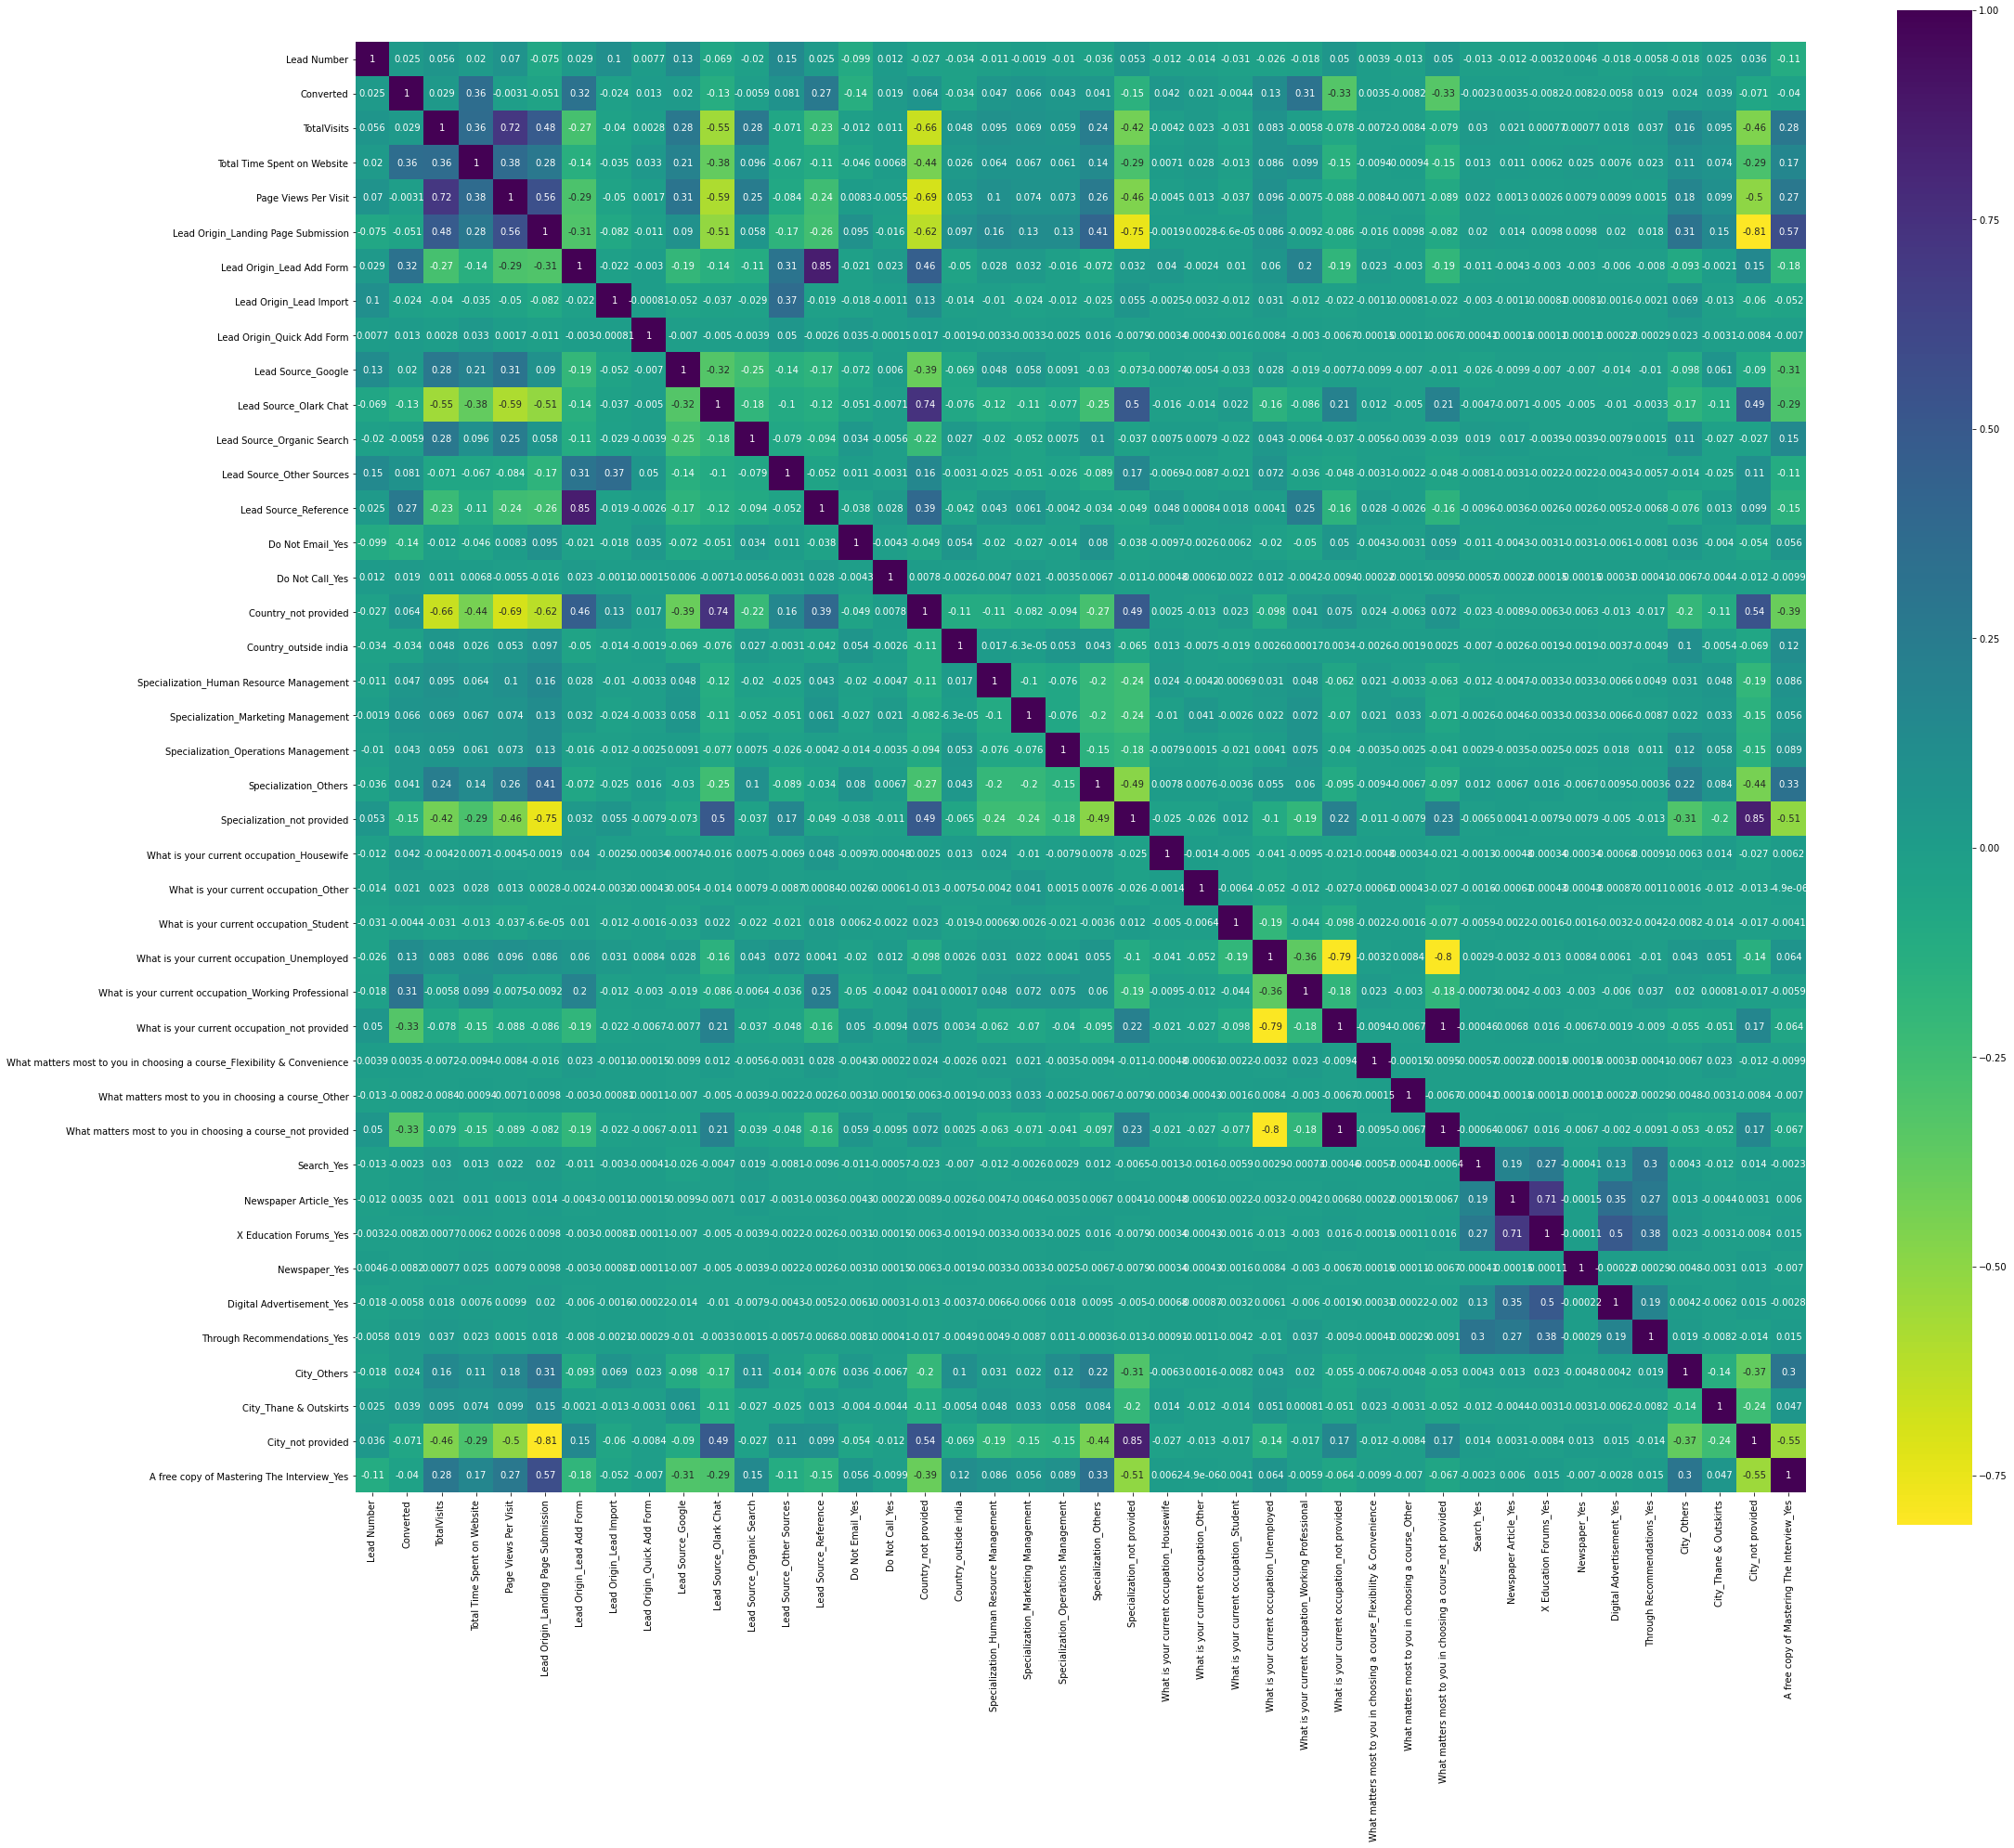

In [90]:
# With annotation
plt.figure(figsize=[35,30])
sns.heatmap(final_leads_df.corr(),square=True,annot=True, cmap='viridis_r')
plt.show()

In [91]:
### Checking the Conversion Rate
ConversionRate = (sum(final_leads_df['Converted'])/len(final_leads_df['Converted'].index))*100
ConversionRate

38.53896103896104

#### We have currently 38.5% Lead Conversion Rate in the data

### Test-Train Split

In [92]:
final_leads_df.columns

Index(['Lead Number', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form', 'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Organic Search', 'Lead Source_Other Sources', 'Lead Source_Reference', 'Do Not Email_Yes', 'Do Not Call_Yes', 'Country_not provided', 'Country_outside india', 'Specialization_Human Resource Management', 'Specialization_Marketing Management', 'Specialization_Operations Management', 'Specialization_Others', 'Specialization_not provided', 'What is your current occupation_Housewife', 'What is your current occupation_Other', 'What is your current occupation_Student', 'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional', 'What is your current occupation_not provided', 'What matters most to you in choosing a course_Flexibility & Convenience',
       'What matt

In [93]:
# Putting feature variable to X
X = final_leads_df.drop(['Converted','Lead Number'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Do Not Email_Yes,Do Not Call_Yes,Country_not provided,Country_outside india,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others,Specialization_not provided,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_not provided,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,City_Others,City_Thane & Outskirts,City_not provided,A free copy of Mastering The Interview_Yes
0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [94]:
# Putting response variable to y
y = final_leads_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [95]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [96]:
X_train.shape

(6468, 40)

In [97]:
X_test.shape

(2772, 40)

### Feature Scaling

In [98]:
num_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [99]:
# # Instantiate
scaler = StandardScaler()

# Fit_Transform
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Do Not Email_Yes,Do Not Call_Yes,Country_not provided,Country_outside india,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others,Specialization_not provided,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,What matters most to you in choosing a course_not provided,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,City_Others,City_Thane & Outskirts,City_not provided,A free copy of Mastering The Interview_Yes
1871,-1.251185,-0.885371,-1.305473,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6795,0.526731,0.005716,-0.477772,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3516,0.971210,-0.691418,0.250356,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8105,0.971210,1.365219,1.806184,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3934,-1.251185,-0.885371,-1.305473,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# 7. Modelling

### First Model with all the 40 Variables

In [100]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial()) #Generalized Linear Model
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6427
Model Family:                Binomial   Df Model:                           40
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2833.7
Date:                Mon, 11 Jan 2021   Deviance:                       5667.4
Time:                        20:31:17   Pearson chi2:                 7.67e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -0.1603      1.081     -0.148      0.882      -2.278       1.958
TotalVisits                                                                 0.1713      0.050      3.439      0.001       0.074       0.269
Total Time Spent on Website                                                 1.0906      0.039     27.939      0.000       1.014       1.167
Page Views Per Visit                                                       -0.1240      0.054     -2.317      0.021      -0.229      -0.019
Lead Origin_Landing Page Submission                                        -0.9179      0.149     -6.159      0.000      -1.210      -0.626
Lead Origin_Lead Add Form                                                   3.7092      0.511      7.264      0.000       2.708       4.710
Lead Origin_Lead Import                                                    -1.7066      0.664     -2.571      0.010      -3.008      -0.406
Lead Origin_Quick Add Form                                                 20.1899   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Google                                                          0.1924      0.111      1.733      0.083      -0.025       0.410
Lead Source_Olark Chat                                                      0.1948      0.262      0.745      0.456      -0.318       0.707
Lead Source_Organic Search                                                  0.1458      0.123      1.184      0.236      -0.096       0.387
Lead Source_Other Sources                                                  -0.0735      0.291     -0.253      0.800      -0.643       0.496
Lead Source_Reference                                                      -1.3727      0.500     -2.747      0.006      -2.352      -0.393
Do Not Email_Yes                                                           -1.2805      0.165     -7.769      0.000      -1.604      -0.957
Do Not Call_Yes                                                            21.0020   5.55e+04      0.000      1.000   -1.09e+05    1.09e+05
Country_not provided                                                        1.0115      0.249      4.058      0.000       0.523       1.500
Country_outside india                                                      -0.1115      0.203     -0.550      0.582      -0.509       0.286
Specialization_Human Resource Management                                   -0.2150      0.148     -1.449      0.147      -0.506       0.076
Specialization_Marketing Management                                        -0.2042      0.150     -1.360      0.174      -0.499       0.090
Spe

### Feature Selection using RFE

In [101]:
logreg = LogisticRegression()

In [102]:
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [103]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 15),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 16),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 26),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Olark Chat', False, 12),
 ('Lead Source_Organic Search', False, 11),
 ('Lead Source_Other Sources', False, 23),
 ('Lead Source_Reference', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Do Not Call_Yes', False, 17),
 ('Country_not provided', True, 1),
 ('Country_outside india', False, 24),
 ('Specialization_Human Resource Management', False, 20),
 ('Specialization_Marketing Management', False, 19),
 ('Specialization_Operations Management', False, 22),
 ('Specialization_Others', False, 21),
 ('Specialization_not provided', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your cur

In [104]:
columns=X_train.columns[rfe.support_]

In [105]:
columns ## below columns are selected for modeling

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import', 'Lead Source_Reference', 'Do Not Email_Yes', 'Country_not provided', 'Specialization_not provided', 'What is your current occupation_Housewife', 'What is your current occupation_Other', 'What is your current occupation_Working Professional', 'What matters most to you in choosing a course_Flexibility & Convenience', 'What matters most to you in choosing a course_not provided', 'Newspaper_Yes', 'City_not provided'], dtype='object')

In [106]:
X_train.columns[~rfe.support_] ## These below columns are eliminated

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Quick Add Form', 'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Organic Search', 'Lead Source_Other Sources', 'Do Not Call_Yes', 'Country_outside india', 'Specialization_Human Resource Management', 'Specialization_Marketing Management', 'Specialization_Operations Management', 'Specialization_Others', 'What is your current occupation_Student', 'What is your current occupation_Unemployed', 'What is your current occupation_not provided', 'What matters most to you in choosing a course_Other', 'Search_Yes', 'Newspaper Article_Yes', 'X Education Forums_Yes', 'Digital Advertisement_Yes', 'Through Recommendations_Yes', 'City_Others', 'City_Thane & Outskirts', 'A free copy of Mastering The Interview_Yes'], dtype='object')

##### Assessing the model with StatsModels

In [107]:
X_train_sm1 = sm.add_constant(X_train[columns])
logm2 = sm.GLM(y_train,X_train_sm1, family = sm.families.Binomial())
res = logm2.fit()

In [108]:
res.pvalues[res.pvalues < 0.1].index

Index(['const', 'Total Time Spent on Website', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import', 'Lead Source_Reference', 'Do Not Email_Yes', 'Country_not provided', 'Specialization_not provided', 'What is your current occupation_Working Professional', 'What matters most to you in choosing a course_not provided', 'City_not provided'], dtype='object')

In [109]:
logm2 = sm.GLM(y_train,X_train_sm1[res.pvalues[res.pvalues < 0.1].index], family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())
y_train_pred = res.predict(X_train_sm1[res.pvalues[res.pvalues < 0.1].index]).values.reshape(-1)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2863.2
Date:                Mon, 11 Jan 2021   Deviance:                       5726.4
Time:                        20:31:20   Pearson chi2:                 7.78e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [110]:
y_train_pred[:10]

array([0.45472286, 0.17915649, 0.33061017, 0.66586548, 0.28574246,
       0.97493856, 0.16984945, 0.9961614 , 0.18874762, 0.76960621])

In [111]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Convert_Prob,Lead Number
0,0,0.454723,1871
1,0,0.179156,6795
2,0,0.330610,3516
3,0,0.665865,8105
4,0,0.285742,3934


In [112]:
# Creating new column 'predicted' with 1 if convert_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Lead Number,predicted
0,0,0.454723,1871,0
1,0,0.179156,6795,0
2,0,0.330610,3516,0
3,0,0.665865,8105,1
4,0,0.285742,3934,0


In [113]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3577  425]
 [ 826 1640]]


In [114]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8065862708719852


In [115]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [116]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6650446066504461

<div class="alert alert-block alert-success">
    <b>After RFE, with 15 variables model,the stats are as below, with 0.5 cut-off:</b>
        <ul>
            <li>Accuracy: 80.65%  </li>
            <li>Sensitivity: 66.50% </li>    
        </ul>
</div>

### VIF

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def check_VIF(X):
    vif=pd.DataFrame()
    vif['Features']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF', ascending=False)
    return(vif)

In [119]:
check_VIF(X_train[columns])

,Features,VIF
14,City_not provided,7.28
7,Specialization_not provided,6.94
2,Lead Origin_Lead Add Form,4.66
4,Lead Source_Reference,4.39
6,Country_not provided,2.91
12,What matters most to you in choosing a course_...,1.61
1,Lead Origin_Landing Page Submission,1.36
10,What is your current occupation_Working Profes...,1.28
0,Total Time Spent on Website,1.25
5,Do Not Email_Yes,1.11


In [120]:
columns=columns.drop('City_not provided',1)

In [121]:
check_VIF(X_train[columns])

,Features,VIF
2,Lead Origin_Lead Add Form,4.66
4,Lead Source_Reference,4.36
6,Country_not provided,2.81
7,Specialization_not provided,2.14
12,What matters most to you in choosing a course_...,1.60
1,Lead Origin_Landing Page Submission,1.35
0,Total Time Spent on Website,1.25
10,What is your current occupation_Working Profes...,1.18
5,Do Not Email_Yes,1.11
3,Lead Origin_Lead Import,1.03


In [122]:
X_train_sm2 = sm.add_constant(X_train[columns])
logm3 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial())
res1 = logm3.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2859.1
Date:                Mon, 11 Jan 2021   Deviance:                       5718.3
Time:                        20:31:21   Pearson chi2:                 7.88e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.1157      0.114      1.017      0.309      -0.107       0.339
Total Time Spent on Website                                                 1.0908      0.039     28.276      0.000       1.015       1.166
Lead Origin_Landing Page Submission                                        -0.9146      0.119     -7.681      0.000      -1.148      -0.681
Lead Origin_Lead Add Form                                                   3.4755      0.366      9.495      0.000       2.758       4.193
Lead Origin_Lead Import                                                    -1.5158      0.534     -2.839      0.005      -2.562      -0.469
Lead Source_Reference                                                      -1.3069      0.408     -3.202      0.001      -2.107      -0.507
Do Not Email_Yes                                                           -1.3264      0.162     -8.187      0.000      -1.644      -1.009
Country_not provided                                                        0.9678      0.114      8.510      0.000       0.745       1.191
Specialization_not provided                                                -1.0236      0.120     -8.507      0.000      -1.259      -0.788
What is your current occupation_Housewife                                  22.3336   1.35e+04      0.002      0.999   -2.65e+04    2.66e+04
What is your current occupation_Other                                      -0.9191      0.801     -1.147      0.251      -2.490       0.652
What is your current occupation_Working Professional                        2.4054      0.186     12.948      0.000       2.041       2.769
What matters most to you in choosing a course_Flexibility & Convenience    -2.6821      2.750     -0.975      0.329      -8.071       2.707
What matters most to you in choosing a course_not provided                 -1.1807      0.083    -14.203      0.000      -1.344      -1.018
Newspaper_Yes                                                             -24.4179   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
===========================================================================================================================================
"""

In [123]:
#Columns which significant
signific_cols = res1.pvalues[res1.pvalues <= 0.05].index

In [124]:
signific_cols

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import', 'Lead Source_Reference', 'Do Not Email_Yes', 'Country_not provided', 'Specialization_not provided', 'What is your current occupation_Working Professional', 'What matters most to you in choosing a course_not provided'], dtype='object')

In [125]:
X_train_sm3 = sm.add_constant(X_train[signific_cols])
logm4 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial())
res2 = logm4.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2867.3
Date:                Mon, 11 Jan 2021   Deviance:                       5734.7
Time:                        20:31:21   Pearson chi2:                 8.05e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                          0.1114      0.113      0.982      0.326      -0.111       0.334
Total Time Spent on Website                                    1.0856      0.038     28.237      0.000       1.010       1.161
Lead Origin_Landing Page Submission                           -0.9064      0.119     -7.628      0.000      -1.139      -0.673
Lead Origin_Lead Add Form                                      3.4807      0.366      9.508      0.000       2.763       4.198
Lead Origin_Lead Import                                       -1.5067      0.533     -2.825      0.005      -2.552      -0.461
Lead Source_Reference                                         -1.2932      0.408     -3.169      0.002      -2.093      -0.493
Do Not Email_Yes                                              -1.3323      0.162     -8.222      0.000      -1.650      -1.015
Country_not provided                                           0.9584      0.113      8.446      0.000       0.736       1.181
Specialization_not provided                                   -1.0173      0.120     -8.476      0.000      -1.253      -0.782
What is your current occupation_Working Professional           2.4018      0.186     12.940      0.000       2.038       2.766
What matters most to you in choosing a course_not provided    -1.1794      0.083    -14.204      0.000      -1.342      -1.017
==============================================================================================================================
"""

In [126]:
res2.pvalues.index

Index(['const', 'Total Time Spent on Website', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import', 'Lead Source_Reference', 'Do Not Email_Yes', 'Country_not provided', 'Specialization_not provided', 'What is your current occupation_Working Professional', 'What matters most to you in choosing a course_not provided'], dtype='object')

In [127]:
check_VIF(X_train[res2.pvalues.index.drop('const')])

,Features,VIF
2,Lead Origin_Lead Add Form,4.66
4,Lead Source_Reference,4.35
6,Country_not provided,2.80
7,Specialization_not provided,2.14
9,What matters most to you in choosing a course_...,1.60
1,Lead Origin_Landing Page Submission,1.35
0,Total Time Spent on Website,1.25
8,What is your current occupation_Working Profes...,1.18
5,Do Not Email_Yes,1.11
3,Lead Origin_Lead Import,1.03


In [128]:
y_train_pred_vif = res2.predict(X_train_sm3).values.reshape(-1)

In [129]:
y_train_pred_vif[:10]

array([0.52711717, 0.14111423, 0.33222282, 0.66532989, 0.2872638 ,
       0.97414957, 0.16976044, 0.99539173, 0.1934782 , 0.77516755])

In [130]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred_vif})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Convert_Prob,Lead Number
0,0,0.527117,1871
1,0,0.141114,6795
2,0,0.332223,3516
3,0,0.665330,8105
4,0,0.287264,3934


In [131]:
# Creating new column 'predicted' with 1 if convert_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Lead Number,predicted
0,0,0.527117,1871,1
1,0,0.141114,6795,0
2,0,0.332223,3516,0
3,0,0.665330,8105,1
4,0,0.287264,3934,0


In [132]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3572  430]
 [ 817 1649]]


In [133]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.807204700061843


In [134]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [135]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6686942416869425

<div class="alert alert-block alert-success">
    <b>After manual feature reduction using p-values and VIF, with 10 variables model,the stats are as below:</b>
        <ul>
            <li>Accuracy: 80.65%  </li>
            <li>Sensitivity: 66.5% </li>    
        </ul>
</div>

### ROC (Recursive Operatinfg Curve)

In [137]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [138]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convert_Prob, drop_intermediate = False )

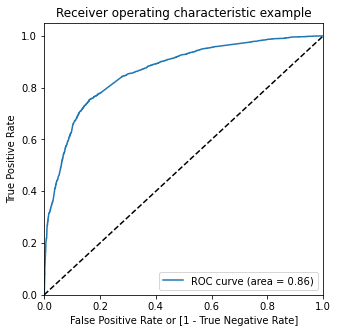

In [139]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

In [140]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.527117,1871,1,1,1,1,1,1,1,0,0,0,0
1,0,0.141114,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.332223,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.665330,8105,1,1,1,1,1,1,1,1,0,0,0
4,0,0.287264,3934,0,1,1,1,0,0,0,0,0,0,0


In [141]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.524428  0.979319  0.244128
0.2   0.2  0.704082  0.899432  0.583708
0.3   0.3  0.793445  0.776967  0.803598
0.4   0.4  0.807359  0.724655  0.858321
0.5   0.5  0.807205  0.668694  0.892554
0.6   0.6  0.790198  0.580697  0.919290
0.7   0.7  0.768553  0.488240  0.941279
0.8   0.8  0.735931  0.352798  0.972014
0.9   0.9  0.713976  0.268451  0.988506


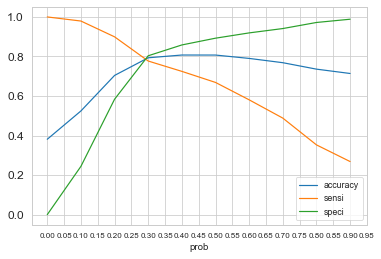

In [142]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set_style("whitegrid")
sns.set_context("paper")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.yticks(size=12)
plt.show()

#### From the curve above, 0.28 is the optimum point to take it as a cutoff probability.

In [143]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.28 else 0)

y_train_pred_final.head()

,Converted,Convert_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.527117,1871,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.141114,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.332223,3516,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.665330,8105,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.287264,3934,0,1,1,1,0,0,0,0,0,0,0,1


In [144]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7660791589363017

In [145]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2870, 1132],
       [ 381, 2085]], dtype=int64)

In [146]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [147]:
# Let's see the sensitivity (Recall) of our logistic regression model
TP / float(TP+FN)

0.8454987834549879

<div class="alert alert-block alert-success">
    <b>After selecting signification vairables post-RFE using P-Value and VIF selection and ROC curve analysis, by choosing the cutt-off as 0.28, with 10 variables model,the stats are as below for the train data:</b>
        <ul>
            <li>Accuracy: 76.60%  </li>
            <li>Sensitivity: 84.54% </li>    
        </ul>
</div>

### Precision and recall tradeoff

In [148]:
#Looking at the confusion matrix again

##### Precision
TP / TP + FP

In [149]:
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.6481193658688219

##### Recall
TP / TP + FN

In [150]:
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8454987834549879

In [151]:
from sklearn.metrics import precision_recall_curve

In [152]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [153]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

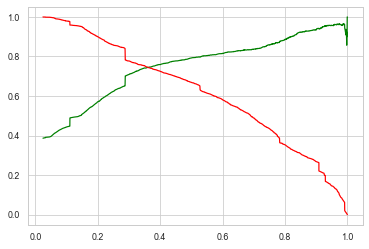

In [154]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### The above plot would help when we look for Precision and Recall together
#### But this business requirement indicates, we should concentrate more on Sensitivity, so we go ahead with the same cut-off of 0.28 for Test Data as well 

### Make Predictions on Test

In [155]:
num_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [156]:
X_test.shape

(2772, 40)

In [157]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [158]:
X_test = X_test[signific_cols]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Reference,Do Not Email_Yes,Country_not provided,Specialization_not provided,What is your current occupation_Working Professional,What matters most to you in choosing a course_not provided
4269,0.964504,0,0,0,0,0,0,1,0,1
2376,-0.885371,0,1,0,1,0,1,1,0,0
7766,-0.777416,0,0,0,0,0,0,0,1,0
9199,-0.885371,0,0,0,0,0,1,1,0,0
4359,-0.885371,0,1,0,1,0,1,0,0,0


In [159]:
X_test_sm = sm.add_constant(X_test[signific_cols])

In [160]:
y_test_pred = res2.predict(X_test_sm)

In [161]:
y_test_pred[:10]

4269    0.261493
2376    0.782251
7766    0.841470
9199    0.287264
4359    0.908555
9186    0.368077
1631    0.563673
8963    0.208382
8007    0.095153
5324    0.191802
dtype: float64

In [162]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4269,0.261493
2376,0.782251
7766,0.841470
9199,0.287264
4359,0.908555


In [163]:
y_test_df = pd.DataFrame(y_test)

y_test_df['Lead Number'] = y_test_df.index # Putting Lead Number to index

In [164]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [165]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [166]:
y_pred_final.head()

,Converted,Lead Number,0
0,1,4269,0.261493
1,1,2376,0.782251
2,1,7766,0.841470
3,0,9199,0.287264
4,1,4359,0.908555


In [167]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [168]:
y_pred_final

,Converted,Lead Number,Convert_Prob
0,1,4269,0.261493
1,1,2376,0.782251
2,1,7766,0.841470
3,0,9199,0.287264
4,1,4359,0.908555
...,...,...,...
2767,0,8649,0.086310
2768,1,2152,0.929039
2769,0,7101,0.287264
2770,0,5331,0.254695


In [169]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.28 else 0)

In [170]:
y_pred_final.head()

,Converted,Lead Number,Convert_Prob,final_predicted
0,1,4269,0.261493,0
1,1,2376,0.782251,1
2,1,7766,0.841470,1
3,0,9199,0.287264,1
4,1,4359,0.908555,1


In [171]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7712842712842712

In [172]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1197,  480],
       [ 154,  941]], dtype=int64)

In [173]:
#Precision
confusion3[1,1]/(confusion3[0,1]+confusion3[1,1])

0.6622097114707952

In [174]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [175]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8593607305936073

In [176]:
signific_cols

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import', 'Lead Source_Reference', 'Do Not Email_Yes', 'Country_not provided', 'Specialization_not provided', 'What is your current occupation_Working Professional', 'What matters most to you in choosing a course_not provided'], dtype='object')

<div class="alert alert-block alert-success">
    <b>After choosing the cutt-off as 0.28, with 10 variables model,the stats are as below for the test data:</b>
        <ul>
            <li>Accuracy: 77.12%  </li>
            <li>Sensitivity: 85.93% </li>    
        </ul>
</div>

## Lift and Gain Method for Maximizing the Conversion rate

In [177]:
sorted_predict_df = y_pred_final[['Convert_Prob',
                               'Converted']].sort_values( 'Convert_Prob',
                                                      ascending = False )

In [178]:
sorted_predict_df.head(5)

,Convert_Prob,Converted
546,0.999681,1
2405,0.999418,1
745,0.999069,1
1091,0.998887,1
2150,0.998716,1


In [179]:
num_per_decile = int( len( sorted_predict_df ) / 10 )
print( "Number of observations per decile: ", num_per_decile)

Number of observations per decile:  277


In [180]:
def get_decile( df ): 
    df['decile'] = 1
    idx = 0
    for each_d in range( 0, 10 ):
        df.iloc[idx:idx+num_per_decile, 
                df.columns.get_loc('decile')] = each_d,
        idx += num_per_decile
       
    df['decile'] = df['decile'] + 1 
    return df

In [181]:
deciles_predict_df = get_decile(sorted_predict_df)
deciles_predict_df

,Convert_Prob,Converted,decile
546,0.999681,1,1
2405,0.999418,1,1
745,0.999069,1,1
1091,0.998887,1,1
2150,0.998716,1,1
...,...,...,...
2034,0.007437,0,10
2521,0.007009,0,10
1136,0.006389,0,10
597,0.005846,0,2


In [182]:
gain_lift_df = pd.DataFrame( 
    deciles_predict_df.groupby(
        'decile')['Converted'].sum() ).reset_index() 
gain_lift_df.columns = ['decile', 'gain']
gain_lift_df

,decile,gain
0,1,260
1,2,208
2,3,202
3,4,154
4,5,105
5,6,61
6,7,61
7,8,25
8,9,14
9,10,5


In [183]:
pd.options.display.float_format = '{:.2f}'.format
final_parameters = res2.params[1:]
final_parameters

Total Time Spent on Website                                   1.09
Lead Origin_Landing Page Submission                          -0.91
Lead Origin_Lead Add Form                                     3.48
Lead Origin_Lead Import                                      -1.51
Lead Source_Reference                                        -1.29
Do Not Email_Yes                                             -1.33
Country_not provided                                          0.96
Specialization_not provided                                  -1.02
What is your current occupation_Working Professional          2.40
What matters most to you in choosing a course_not provided   -1.18
dtype: float64

In [184]:
#fetching co-effient value for all the features with the feature with the highest coefficient
top_predictors = final_parameters
top_predictors = 100.0 * (top_predictors / top_predictors.max())
top_predictors

Total Time Spent on Website                                   31.19
Lead Origin_Landing Page Submission                          -26.04
Lead Origin_Lead Add Form                                    100.00
Lead Origin_Lead Import                                      -43.29
Lead Source_Reference                                        -37.15
Do Not Email_Yes                                             -38.28
Country_not provided                                          27.53
Specialization_not provided                                  -29.23
What is your current occupation_Working Professional          69.00
What matters most to you in choosing a course_not provided   -33.88
dtype: float64

In [185]:
# Sorting the Predictor variables based on their repective coefficient values
top_predictors_sort = np.argsort(top_predictors,kind='quicksort',order='list of str')
top_predictors_sort

Total Time Spent on Website                                   3
Lead Origin_Landing Page Submission                           5
Lead Origin_Lead Add Form                                     4
Lead Origin_Lead Import                                       9
Lead Source_Reference                                         7
Do Not Email_Yes                                              1
Country_not provided                                          6
Specialization_not provided                                   0
What is your current occupation_Working Professional          8
What matters most to you in choosing a course_not provided    2
dtype: int64

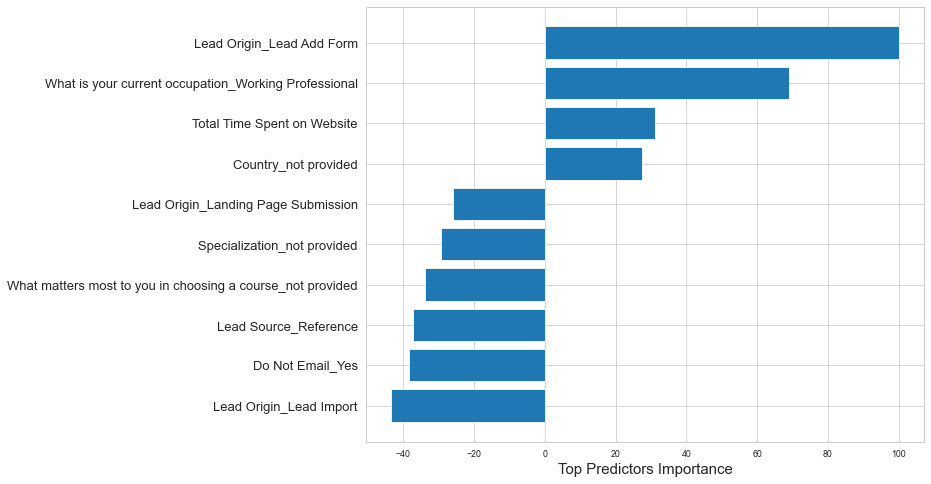

In [186]:
# Plotting the predictors based on their relative importance

pos = np.arange(top_predictors_sort.shape[0]) + .5

fig1 = plt.figure(figsize=(10,8));
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_predictors[top_predictors_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[signific_cols].columns)[top_predictors_sort], fontsize=13)
ax.set_xlabel('Top Predictors Importance', fontsize=15)
plt.show()

<a id="conclusion"></a>
# 8. Inferences & Conclusion

<div class="alert alert-block alert-success">
    <b>EDA Inferences</b>
    <ul>
        <li> <b> Lead Origin:</b><ul>
            <li>Univariate Analysis  states that almost 53% of the Lead Origin is from 'Landing Page Submission' followed by 39% from ‘API’
<br>
<li>Bivariate Analysis  indicates that ‘Quick Add Form’ has 100%, ‘Lead Add Form’ has 92%, 'Landing Page Submission' has 36% of Conversion and 'API' has 31% of Conversion</ul>
        <li> <b> Lead Source:</b><ul>
                    <li>Univariate Analysis states that 31% of the Lead Source is from 'Google' followed by 28% from 'Direct Traffic’
        <br>
        <li>Bivariate Analysis indicates that ‘Reference' has a conversion of 92%, 'Google' as a Lead Source has 40% of Conversion and 'Direct Traffic' has 32% of Conversion. </ul>
        <li> <b> Specialization:</b><ul>
                    <li>Univariate Analysis states that Specialization around 36% people not selected and around 28% chose 'others' category.
        <br>
        <li>Bivariate Analysis indicates that 49% of converted people selected 'Marketing Management' followed by 'Operations Management' with 47% of Conversion. </ul>
        <li> <b> Tags:</b><ul>
                    <li>Univariate Analysis states that around 36% information was not provided and around 22% people said 'Will revert after reading the email’
        <br>
        <li>Bivariate Analysis indicates that people who said they are  'Interested in Next batch' and 'Lateral student' were converted around 20%.</ul>
        <li> <b> Last Activity</b><ul>
                    <li>Univariate Analysis states that around 37% customers were 'Email Opened' and around 30% customers were 'sent SMS' also.
        <br>
        <li>Bivariate Analysis indicates that customers categories includes 'Approached upfront', 'Email Marked Spam', 'Email Received', 'Resubscribed to emails' were converted around 40%. </ul>
</ul>
<br><b> Multi variate Analysis tells </b> <ul>
    <li>Page Views Per Visit and TotalVisits are moderately correlated - 0.51
    </ul>

<div class="alert alert-block alert-success">
    <b>After RFE, with 15 variables model,the stats are as below, with 0.5 cut-off:</b>
        <ul>
            <li>Accuracy: 80.65%  </li>
            <li>Sensitivity: 66.50% </li>    
        </ul>
</div>

<div class="alert alert-block alert-success">
    <b>After selecting signification vairables post-RFE using P-Value and VIF selection and ROC curve analysis, by choosing the cutt-off as 0.28, with 10 variables model,the stats are as below for the train data:</b>
        <ul>
            <li>Accuracy: 76.60%  </li>
            <li>Sensitivity: 84.54% </li>    
        </ul>
</div>

<div class="alert alert-block alert-success">
    <b>After choosing the cutt-off as 0.28, with 10 variables model, the stats are as below for the test data:</b>
        <ul>
            <li>Accuracy: 77.12%  </li>
            <li>Sensitivity: 85.93% </li>    
        </ul>
</div>

<div class="alert alert-block alert-success">
    <b>Model Conclusions</b>
    <br>
    <b>Top Variables impacting the Lead Conversion are: </b>
    <ul>
        <li>Positively impacting: <ol>
            <li> Lead Orgin: 'Lead Add Form' Category
            <li> What is your current occupation: 'Working Professional' Category
            <li> Total Time Spent on Website Metric
            <li> Country: 'Not Provided' Category
            </ol>        
        <li>Negatively impacting: <ol>
            <li> Lead Orgin: 'Lead Import' Category
            <li> Do Not Email: 'Yes' Category
            <li> Lead Source: 'Reference' Category
            <li> What Matters you the most in choosing a course: 'Not Provided' Category
            <li> Specialization: 'Not Provided' Category
            <li> Lead Origin: 'Landing Page Submission' Category    
            </ol> 
